# Выбор локации для скважины

### Описание проекта:

### Введение
В условиях растущего спроса на энергоресурсы и необходимости оптимизации добычи нефти, компания «ГлавРосГосНефть» ставит перед собой задачу выбора наиболее перспективной локации для бурения новых скважин. Проект направлен на разработку модели, которая позволит на основе имеющихся данных определить регион с наибольшими запасами нефти и, следовательно, максимальной потенциальной прибылью.

### Цели проекта
Основной целью данного проекта является создание модели машинного обучения, способной предсказать объем запасов нефти в скважинах и выбрать регион с высшей вероятностью успешной разработки. Конкретные цели проекта включают:

1. **Сбор и подготовка данных**: Загрузка и предварительная обработка данных о скважинах, включая очистку, анализ и подготовку для обучения модели.

2. **Обучение модели**: Разработка и валидация модели линейной регрессии для прогнозирования объемов запасов нефти на основе характеристик скважин.

3. **Оценка потенциальной прибыли**: Расчет возможной прибыли от разработки скважин на основе предсказанных объемов запасов и других ключевых параметров.

4. **Анализ рисков**: Применение техники Bootstrap для оценки рисков и распределения прибыли, чтобы определить надежность предсказаний модели.

5. **Выбор региона для разработки**: На основе анализа прибыли и рисков, выбор региона с наибольшей средней прибылью и минимальной вероятностью убытков.

### Задачи проекта
Для достижения поставленных целей проект будет разделен на несколько ключевых задач:

1. **Загрузка и подготовка данных**:
   - Загрузка данных из предоставленных файлов.
   - Анализ структуры и качества данных, выявление пропусков и аномалий.
   - Подготовка данных для обучения модели (разделение на обучающую и валидационную выборки).

2. **Обучение и проверка модели**:
   - Разделение данных на обучающую и валидационную выборки в соотношении 75:25.
   - Обучение модели линейной регрессии на обучающей выборке.
   - Оценка качества модели с использованием RMSE и других метрик.
   - Сохранение предсказаний и правильных ответов для последующего анализа.

3. **Расчет прибыли**:
   - Определение ключевых параметров для расчета прибыли, включая объем необходимого сырья для безубыточной разработки.
   - Сравнение средних запасов нефти в каждом регионе с требуемым объемом.

4. **Оценка рисков и прибыли**:
   - Применение метода Bootstrap для определения распределения прибыли и расчета 95%-го доверительного интервала.
   - Оценка вероятности убытков и выявление регионов с рисками ниже 2.5%.

5. **Выбор региона для разработки**:
   - Сравнение средней прибыли по регионам с учетом риска убытков.
   - Рекомендация региона для бурения с обоснованием выбора на основе проведенного анализа.

### Описание данных

В рамках проекта используются данные геологоразведки, предоставленные в виде трех CSV-файлов. Каждый файл содержит информацию о скважинах в различных регионах. Ниже приведено описание структуры данных и значений, содержащихся в этих файлах.

### Формат данных

Каждый из файлов имеет следующую структуру:

| Параметр | Описание |
|----------|----------|
| `id`     | Уникальный идентификатор скважины. Используется для различения между различными скважинами. |
| `f0`     | Первый признак, представляющий характеристики точки. Значение не имеет явного объяснения, но оно статистически значимо для моделирования. |
| `f1`     | Второй признак, аналогично первому — представляет характеристики точки. |
| `f2`     | Третий признак, также характеристики точки, важный для анализа. |
| `product`| Объем запасов в скважине, указанный в тысячах баррелей. Это целевая переменная, которую мы будем предсказывать с помощью модели. |

### Заключение
Данный проект имеет важное значение для компании «ГлавРосГосНефть», поскольку он направлен на оптимизацию процесса бурения новых скважин и максимизацию экономической эффективности. Успешная реализация проекта позволит не только улучшить финансовые показатели компании, но и повысить ее конкурентоспособность на рынке.

<div class="alert alert-success">
<h3> Комментарий ревьюера <a class="tocSkip"> </h3> 
    
<b>Все отлично! 👍:</b> Очень хорошо, что оставляешь в начале проекта его описание! Любой, кто захочет взглянуть на работу, сможет сразу погрузиться в суть задачи :)

## Импорт необходимых библиотек

In [1]:
import sklearn
print("Scikit-learn version:", sklearn.__version__)

Scikit-learn version: 1.7.1


In [2]:
# импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import phik
import shap

RANDOM_STATE=42
TEST_SIZE=0.25

## Изучение общей информации о полученном датафрейме

### Загрузка данных

In [3]:
try:
    geo1 = pd.read_csv('/datasets/geo_data_0.csv')
    geo2 = pd.read_csv('/datasets/geo_data_1.csv')
    geo3 = pd.read_csv('/datasets/geo_data_2.csv')
except:
    geo1 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_0.csv')
    geo2 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_1.csv')
    geo3 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_2.csv')

Данные загружены успешно, все библиотеки импортированы.

### Изучение данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647

f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.500419       0.250143       2.502647      92.500000
std         0.871832       0.504433       3.248248      44.288691
min        -1.408605      -0.848218     -12.088328       0.000000
25%        -0.072580      -0.200881       0.287748      56.497507
50%         0.502360       0.250252       2.515969      91.849972
75%         1.073581       0.700646       4.715088     128.564089
max         2.362331       1.343769      16.003790     185.364347

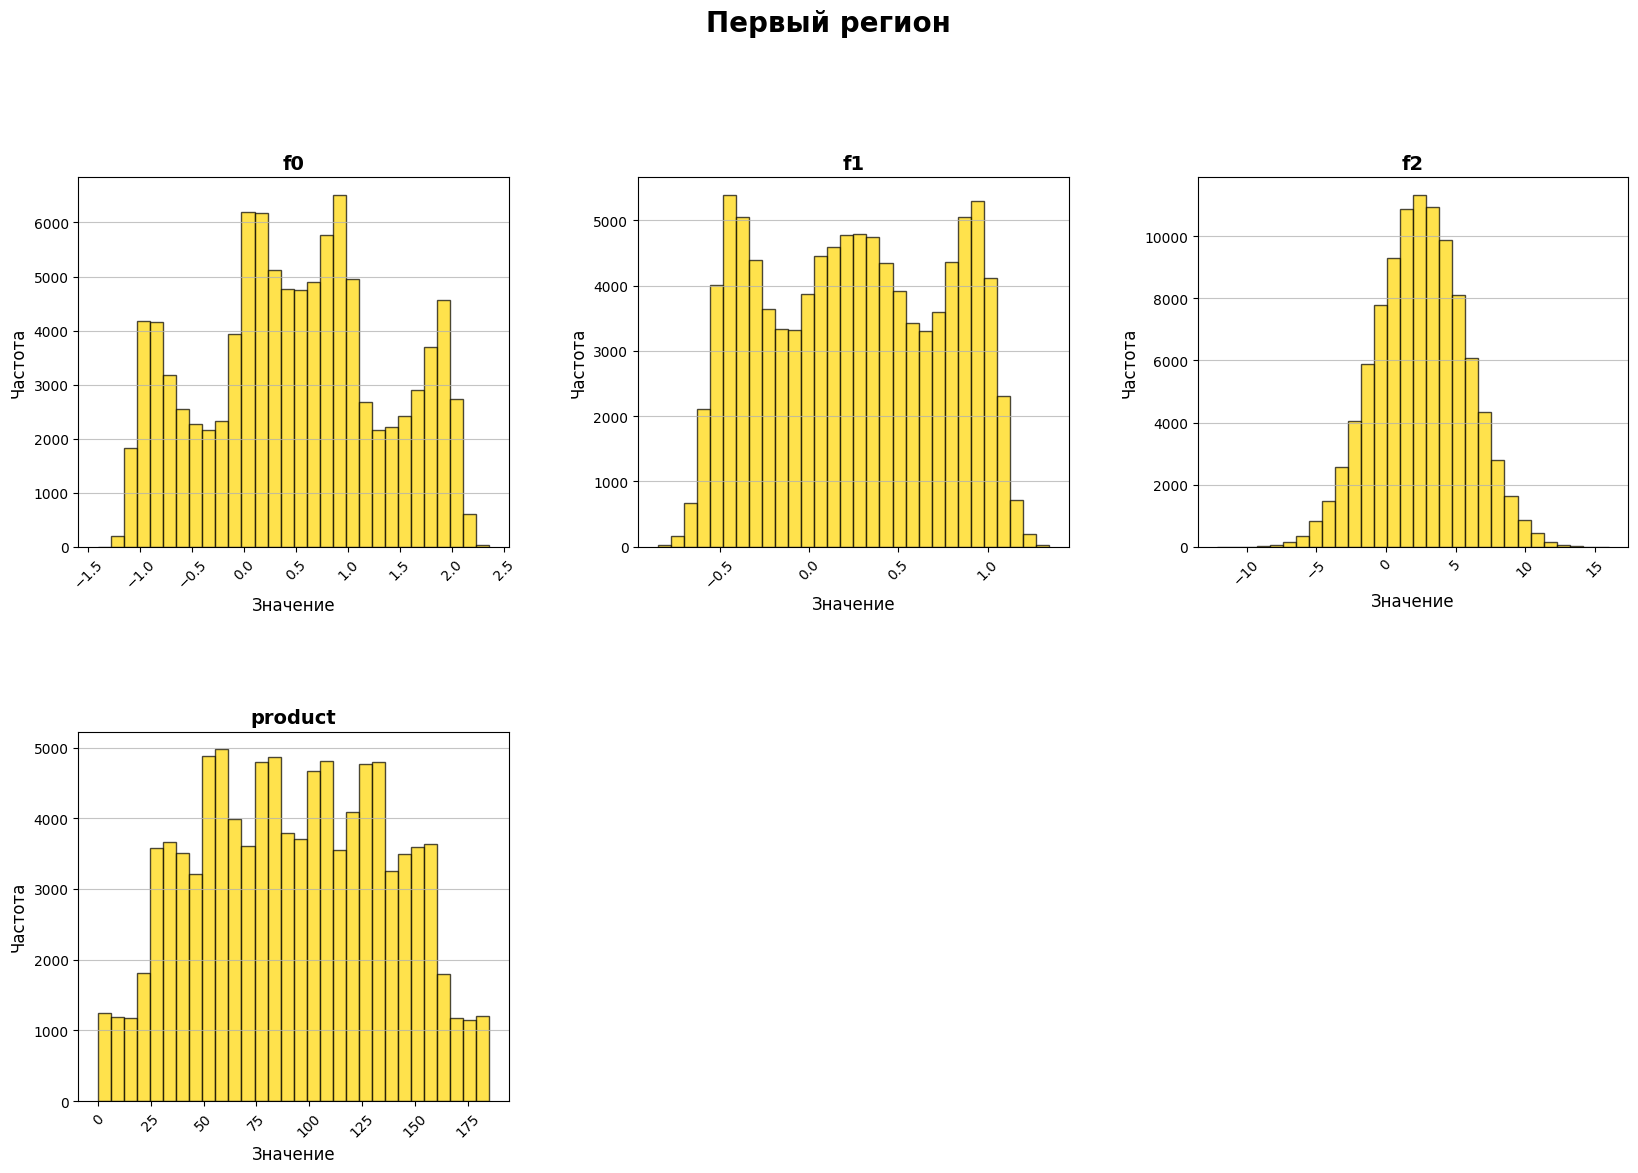

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

id         f0         f1        f2     product
0  kBEdx -15.001348  -8.276000 -0.005876    3.179103
1  62mP7  14.272088  -3.475083  0.999183   26.953261
2  vyE1P   6.263187  -5.948386  5.001160  134.766305
3  KcrkZ -13.081196 -11.506057  4.999415  137.945408
4  AHL4O  12.702195  -8.147433  5.004363  134.766305

f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        1.141296      -4.796579       2.494541      68.825000
std         8.965932       5.119872       1.703572      45.944423
min       -31.609576     -26.358598      -0.018144       0.000000
25%        -6.298551      -8.267985       1.000021      26.953261
50%         1.153055      -4.813172       2.011479      57.085625
75%         8.621015      -1.332816       3.999904     107.813044
max        29.421755      18.734063       5.019721     137.945408

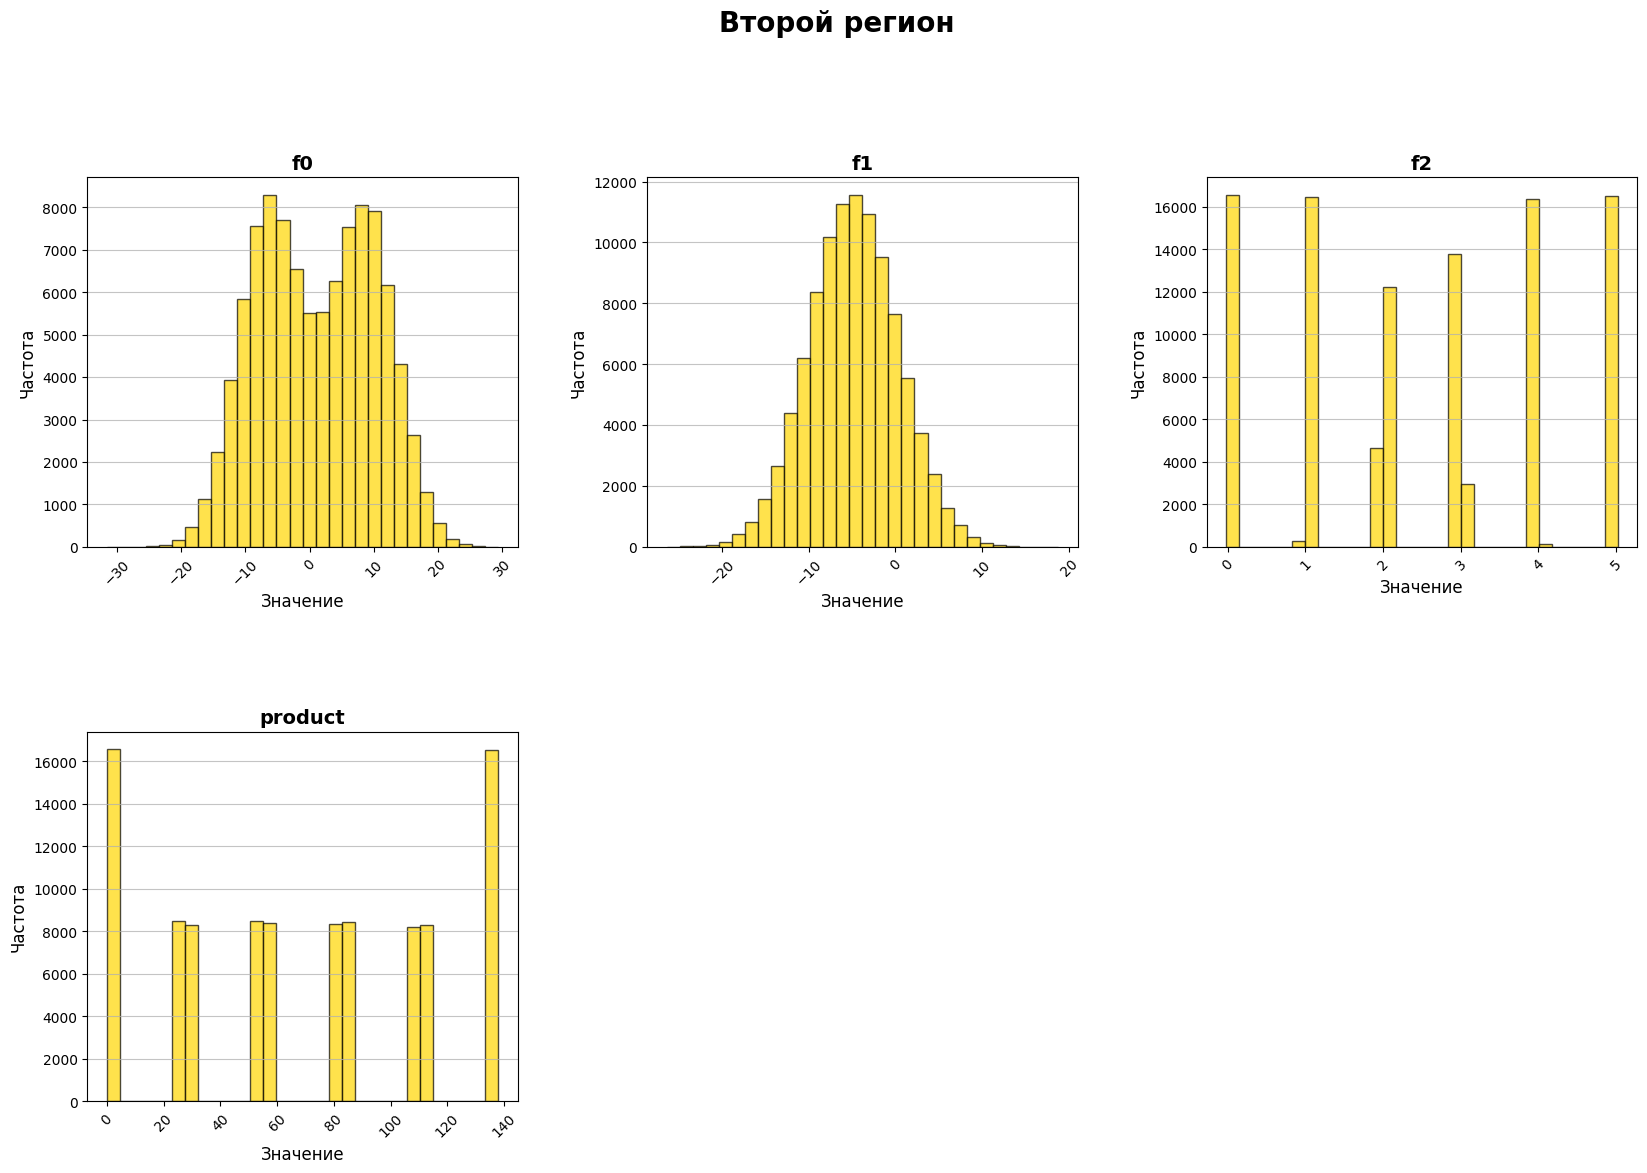

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

id        f0        f1        f2     product
0  fwXo0 -1.146987  0.963328 -0.828965   27.758673
1  WJtFt  0.262778  0.269839 -2.530187   56.069697
2  ovLUW  0.194587  0.289035 -5.586433   62.871910
3  q6cA6  2.236060 -0.553760  0.930038  114.572842
4  WPMUX -0.515993  1.716266  5.899011  149.600746

f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.002023      -0.002081       2.495128      95.000000
std         1.732045       1.730417       3.473445      44.749921
min        -8.760004      -7.084020     -11.970335       0.000000
25%        -1.162288      -1.174820       0.130359      59.450441
50%         0.009424      -0.009482       2.484236      94.925613
75%         1.158535       1.163678       4.858794     130.595027
max         7.238262       7.844801      16.739402     190.029838

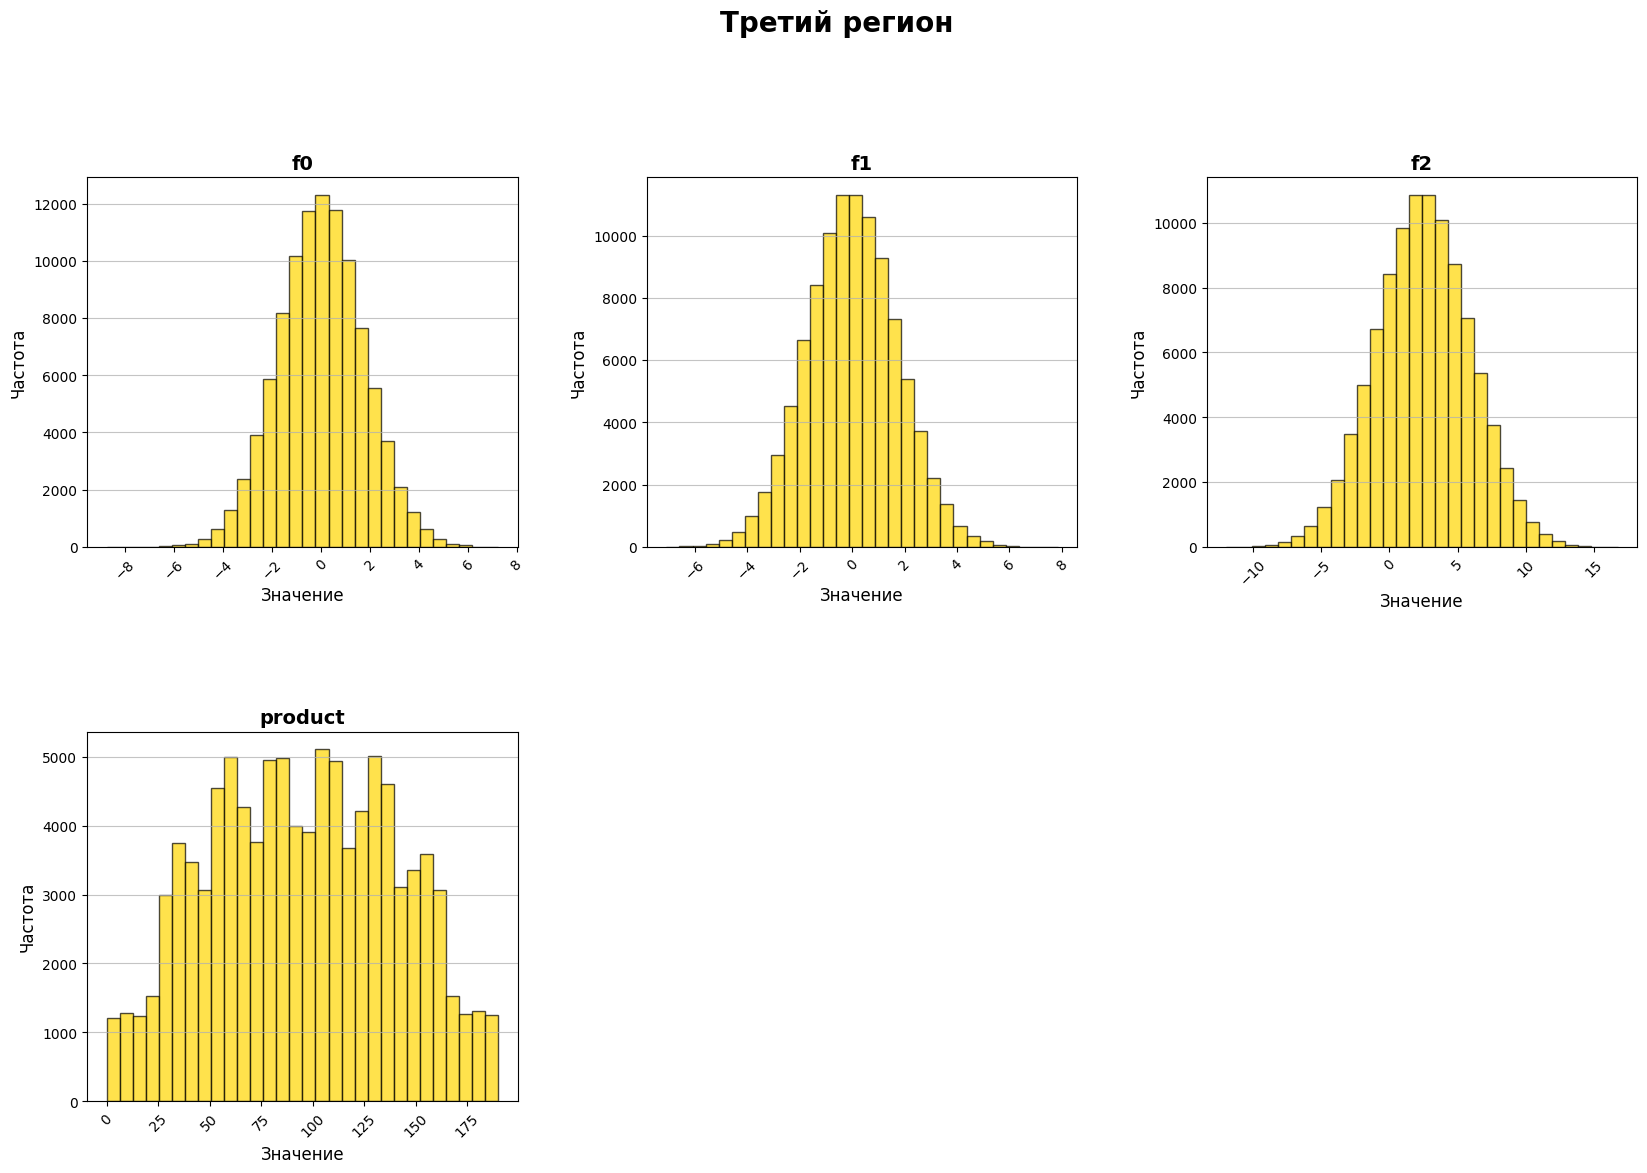

In [4]:
import matplotlib.pyplot as plt

def check_df(df, title):
    # информация о дф
    display(df.info())
    # первые 5 строк
    display(df.head())
    # описательная статистика
    display(df.describe())

    # Извлечение только числовых столбцов
    numeric_df = df.select_dtypes(include=['number'])

    if numeric_df.empty:
        print('нет числовых значений')
        return

    # гистограммы
    num_plots = len(numeric_df.columns)
    plt.figure(figsize=(20, 12))
    for i in range(num_plots):
        plt.subplot((num_plots + 2) // 3, 3, i + 1)
        plt.hist(numeric_df.iloc[:, i], bins=30, color='gold', edgecolor='black', alpha=0.7)
        plt.title(numeric_df.columns[i], fontsize=14, fontweight='bold')
        plt.xlabel('Значение', fontsize=12)
        plt.ylabel('Частота', fontsize=12)
        plt.xticks(rotation=45, fontsize=10)
        plt.yticks(fontsize=10)
        plt.grid(axis='y', alpha=0.75)

    plt.suptitle(title, fontsize=20, fontweight='bold', y=1.02)
    plt.subplots_adjust(wspace=0.3, hspace=0.5)
    plt.show()


check_df(geo1, title="Первый регион")
check_df(geo2, title="Второй регион")
check_df(geo3, title="Третий регион")

### Вывод по изучению данных

**Общая информация о данных**

1. **Количество записей**: В каждом из трех наборов данных содержится 100,000 записей. Это достаточно большой объем данных, что поможет в построении надежной модели.

2. **Структура данных**: Каждый набор данных состоит из 5 колонок:
   - `id`: уникальный идентификатор записи (тип данных — `object`).
   - `f0`, `f1`, `f2`: числовые фичи (тип данных — `float64`), которые, вероятно, представляют собой различные характеристики, влияющие на целевую переменную.
   - `product`: целевая переменная, которая также является числовой (тип данных — `float64`).

**Описание признаков**

3. **Статистические характеристики**: 
   - Признаки `f0`, `f1`, и `f2` имеют различные диапазоны значений и распределения. Например:
     - `f0` имеет значения от -31.61 до 29.42, с довольно высоким стандартным отклонением, что может указывать на наличие выбросов.
     - `f1` также показывает значительные колебания, с минимальным значением -26.36 и максимальным 18.73.
     - `f2` варьируется от -12.09 до 16.00, что также может свидетельствовать о наличии различных сценариев в данных.
   - Целевая переменная `product` имеет значения от 0 до 190, что может указывать на широкий диапазон результатов, которые необходимо предсказать.

4. **Сводные статистики**:
   - Средние значения признаков варьируются, что указывает на то, что данные не симметричны. Это может потребовать дополнительной обработки, такой как нормализация или стандартизация, перед использованием в модели.
   - Минимальные и максимальные значения показывают наличие выбросов, что может повлиять на качество модели.

## Предобработка данных

### Обработка пропусков и дубликатов

#### Обработка явных дубликатов и пропусков

In [5]:
# посчитаю количество пропусков и дубликатов в каждом столбце
def analyze_dataframe(df, df_name):
    print(f'Анализ: {df_name}')
    print('Количество пропусков в каждом столбце:')
    print(df.isna().sum())
    print('Дубликаты:', df.duplicated().sum())
    print()

analyze_dataframe(geo1, 'Первый регион')
analyze_dataframe(geo2, 'Второй регион')
analyze_dataframe(geo3, 'Третий регион')

Анализ: Первый регион
Количество пропусков в каждом столбце:
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
Дубликаты: 0

Анализ: Второй регион
Количество пропусков в каждом столбце:
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
Дубликаты: 0

Анализ: Третий регион
Количество пропусков в каждом столбце:
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
Дубликаты: 0



- Пропусков и явных дубликатов не обнаружено, что показывает отличное качество данных.

### Обработка столбца id

Так как значение столбца id не несет в себе никакой смысловой нагрузки в полученных данных, преобразуем его в индекс.

In [6]:
def process_dataframe(df):
    # установка столбца 'id' в качестве индекса
    df.set_index('id', inplace=True)
    
    # сброс индекса и приведение его к значениям, начинающимся с 0
    df.reset_index(drop=True, inplace=True)
    
    return df

display(process_dataframe(geo1))
display(process_dataframe(geo2))
process_dataframe(geo3)

f0        f1        f2     product
0      0.705745 -0.497823  1.221170  105.280062
1      1.334711 -0.340164  4.365080   73.037750
2      1.022732  0.151990  1.419926   85.265647
3     -0.032172  0.139033  2.978566  168.620776
4      1.988431  0.155413  4.751769  154.036647
...         ...       ...       ...         ...
99995  0.971957  0.370953  6.075346  110.744026
99996  1.392429 -0.382606  1.273912  122.346843
99997  1.029585  0.018787 -1.348308   64.375443
99998  0.998163 -0.528582  1.583869   74.040764
99999  1.764754 -0.266417  5.722849  149.633246

[100000 rows x 4 columns]

f0         f1        f2     product
0     -15.001348  -8.276000 -0.005876    3.179103
1      14.272088  -3.475083  0.999183   26.953261
2       6.263187  -5.948386  5.001160  134.766305
3     -13.081196 -11.506057  4.999415  137.945408
4      12.702195  -8.147433  5.004363  134.766305
...          ...        ...       ...         ...
99995   9.535637  -6.878139  1.998296   53.906522
99996 -10.160631 -12.558096  5.005581  137.945408
99997  -7.378891  -3.084104  4.998651  137.945408
99998   0.665714  -6.152593  1.000146   30.132364
99999  -3.426139  -7.794274 -0.003299    3.179103

[100000 rows x 4 columns]

f0        f1        f2     product
0     -1.146987  0.963328 -0.828965   27.758673
1      0.262778  0.269839 -2.530187   56.069697
2      0.194587  0.289035 -5.586433   62.871910
3      2.236060 -0.553760  0.930038  114.572842
4     -0.515993  1.716266  5.899011  149.600746
...         ...       ...       ...         ...
99995 -1.777037  1.125220  6.263374  172.327046
99996 -1.261523 -0.894828  2.524545  138.748846
99997 -1.199934 -2.957637  5.219411  157.080080
99998 -2.419896  2.417221 -5.548444   51.795253
99999 -2.551421 -2.025625  6.090891  102.775767

[100000 rows x 4 columns]

### Вывод по предобработке данных

**Анализ пропусков и дубликатов**:
  - Анализ данных показал, что пропуски в  данных отсутсвуют, как и все виды дубликатов.

2. **Обработка ненужных данных**
  - Значения в столбце `id` были преобразованы в id.

## Исследовательский анализ данных

### Количественные признаки

In [7]:
# функция для визуализации количественных данных
def hist_box_df(df, column, title):
    plt.figure(figsize=(16, 6))
    plt.suptitle(title, fontsize=16)

    # если признак дискретный, используем countplot
    if df[column].nunique() < 20:
        plt.subplot(1, 1, 1)
        sns.countplot(data=df, x=column, color='gold', alpha=0.7, edgecolor='black')
        plt.title('Количество уникальных значений')
        plt.xlabel(title)
        plt.ylabel('Частота')
        plt.xticks(rotation=45)
    else:
        # гистограмма с наложенным графиком плотности
        plt.subplot(1, 2, 1)
        sns.histplot(df[column], bins=50, color='green', alpha=0.5, edgecolor='black', kde=True)
        plt.title('Гистограмма с графиком плотности')
        plt.xlabel(title)
        plt.ylabel('Частота')

        # диаграмма размаха (ящик с усами)
        plt.subplot(1, 2, 2)
        plt.boxplot(df[column])
        plt.title('Ящик с усами')
        plt.ylabel(title)

    plt.tight_layout()
    plt.show()

#### Первый регион

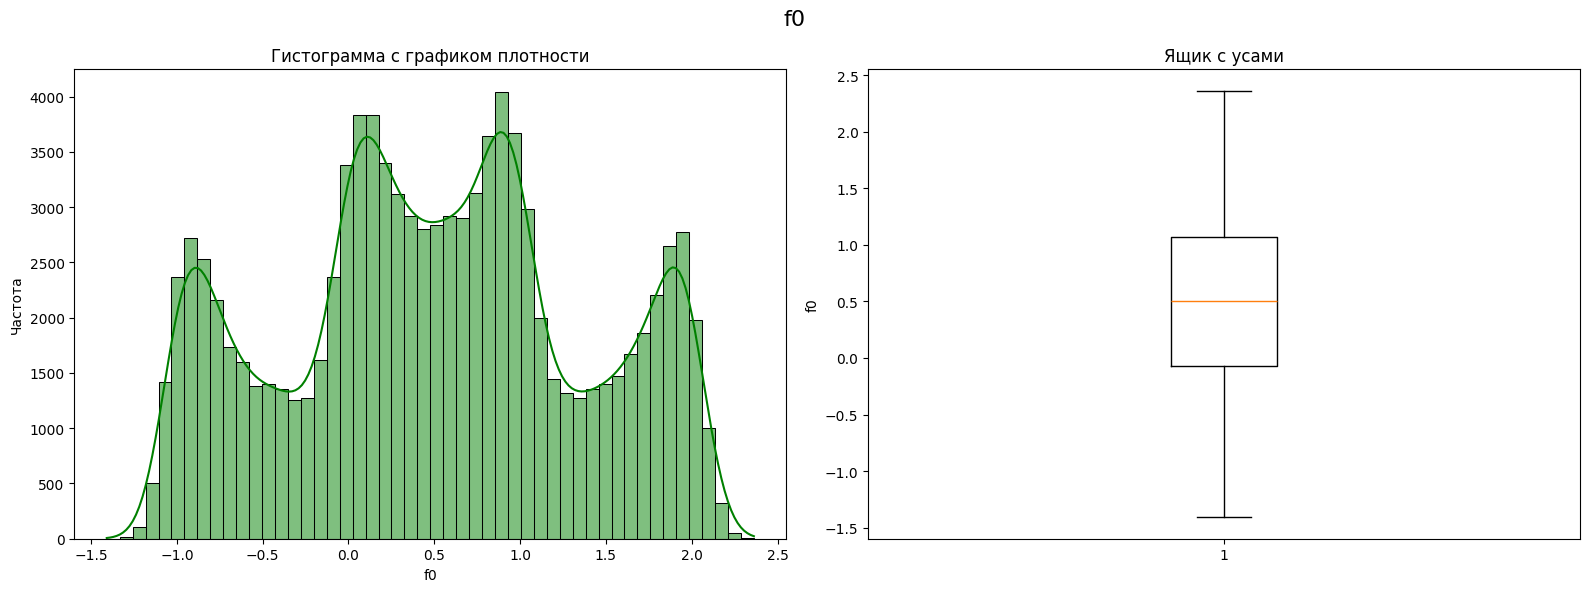

In [8]:
hist_box_df(geo1, 'f0', 'f0')

- Распределение мультимодальное. В данных встречается, как минимум, 4 значения, повторяющиеся чаще всего.
- Выбросов нет.

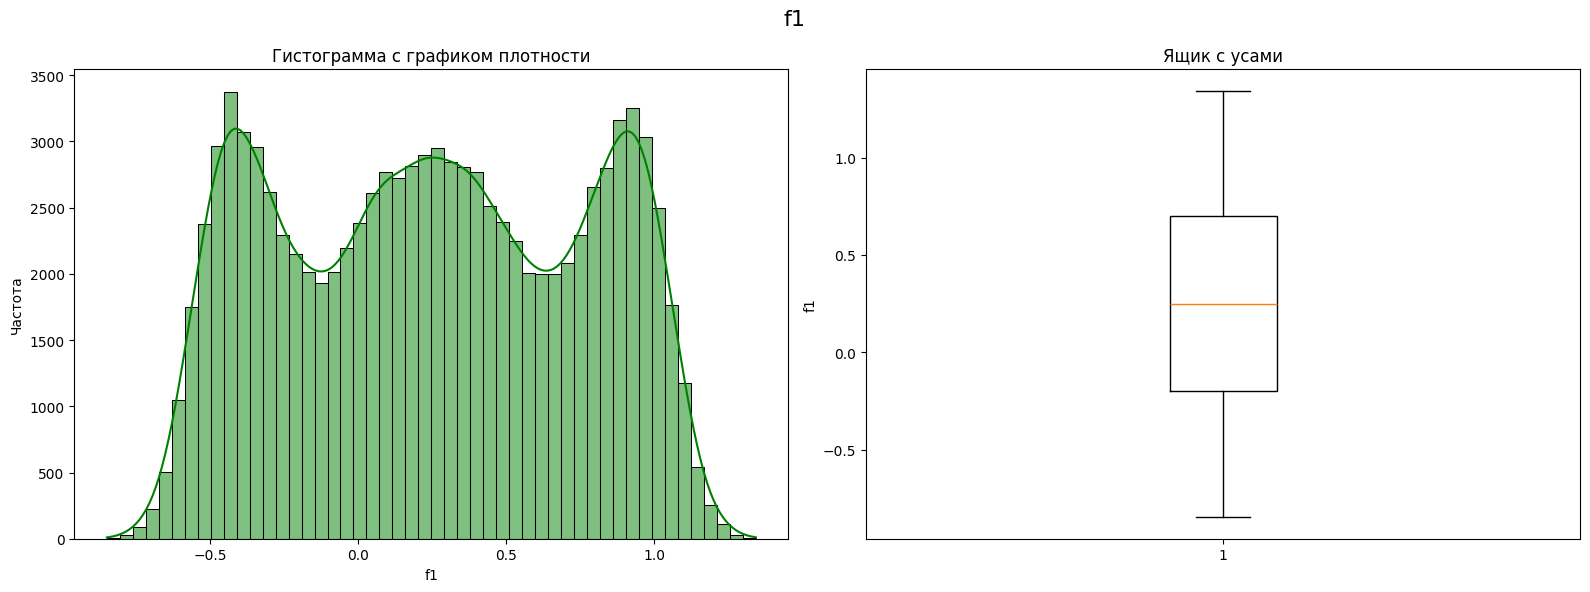

In [9]:
hist_box_df(geo1, 'f1', 'f1')

- Аналогично первому признаку, только количество мод - 3.
- Выбросов нет.

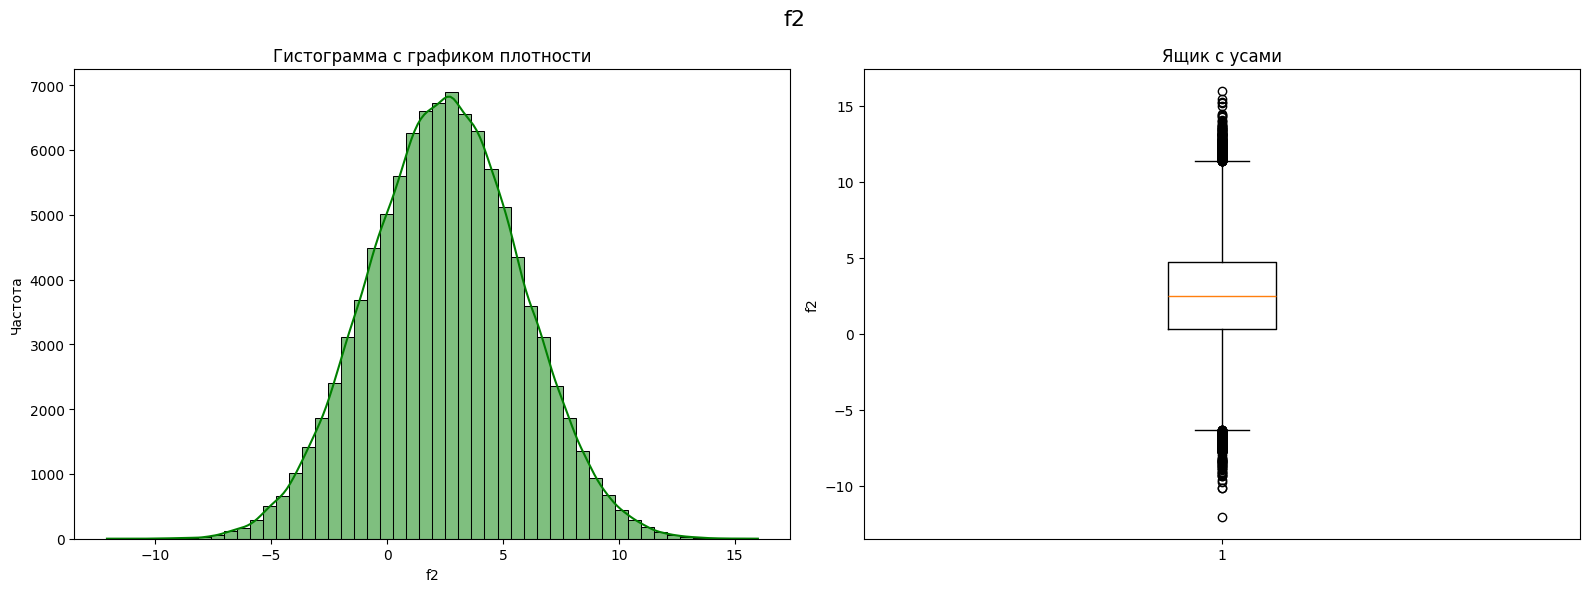

In [10]:
hist_box_df(geo1, 'f2', 'f2')

- Распределение похоже на нормальное, но оно довольно узкое, значит это распределение Стьюдента.
- Показывает наличие выбросов, но на распределении они не отображаются.

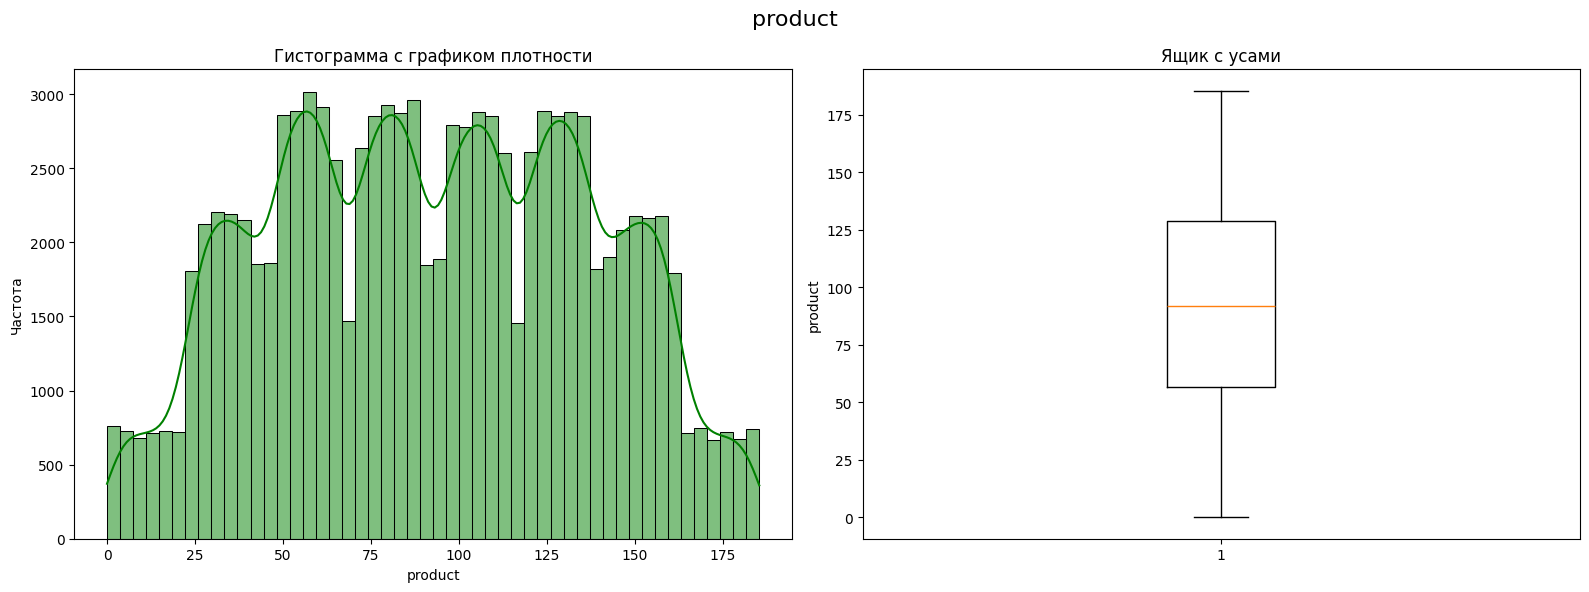

In [11]:
hist_box_df(geo1, 'product', 'product')

- Распределения нет, видно много пиков, каждый из которых находится примерно на одном уровне.
- Выбросов нет.

#### Второй регион

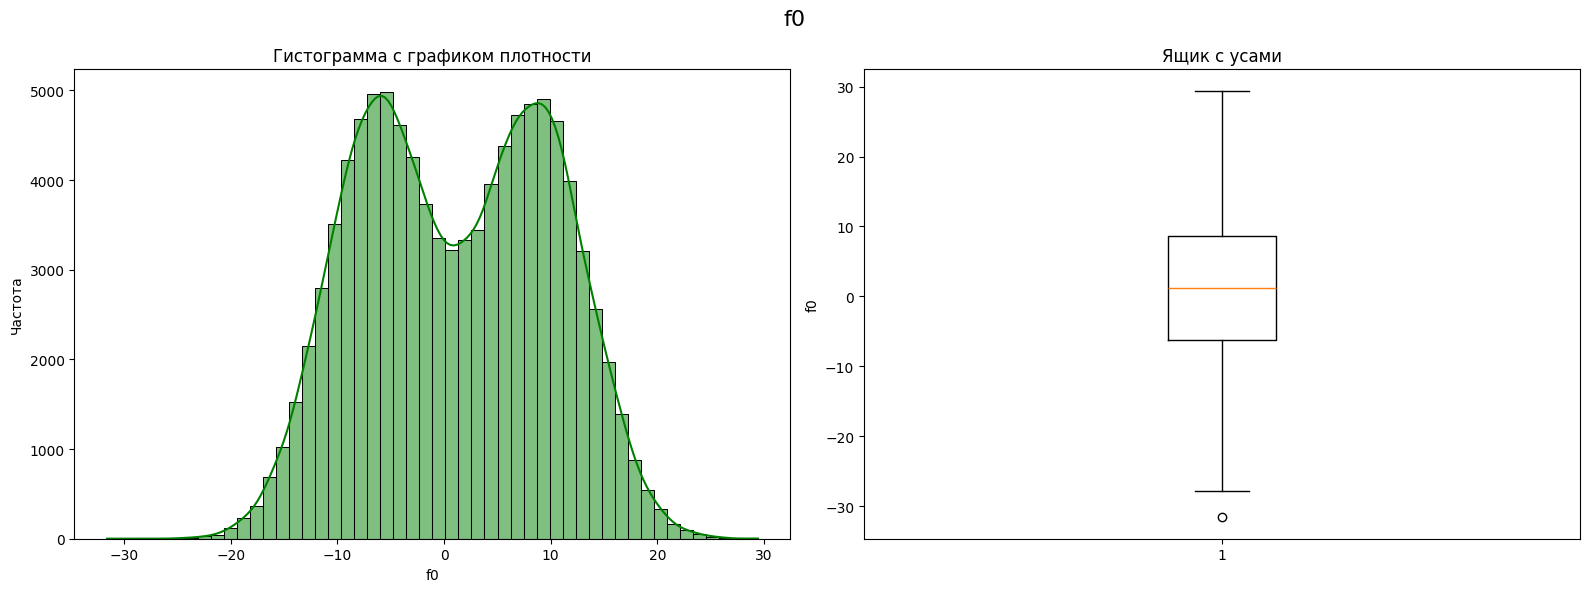

In [12]:
hist_box_df(geo2, 'f0', 'f0')

- Распределение бимодальное, два ярко выраженных пика.
- Показывает наличие одного выброса, который также не отображается на гистограмме.

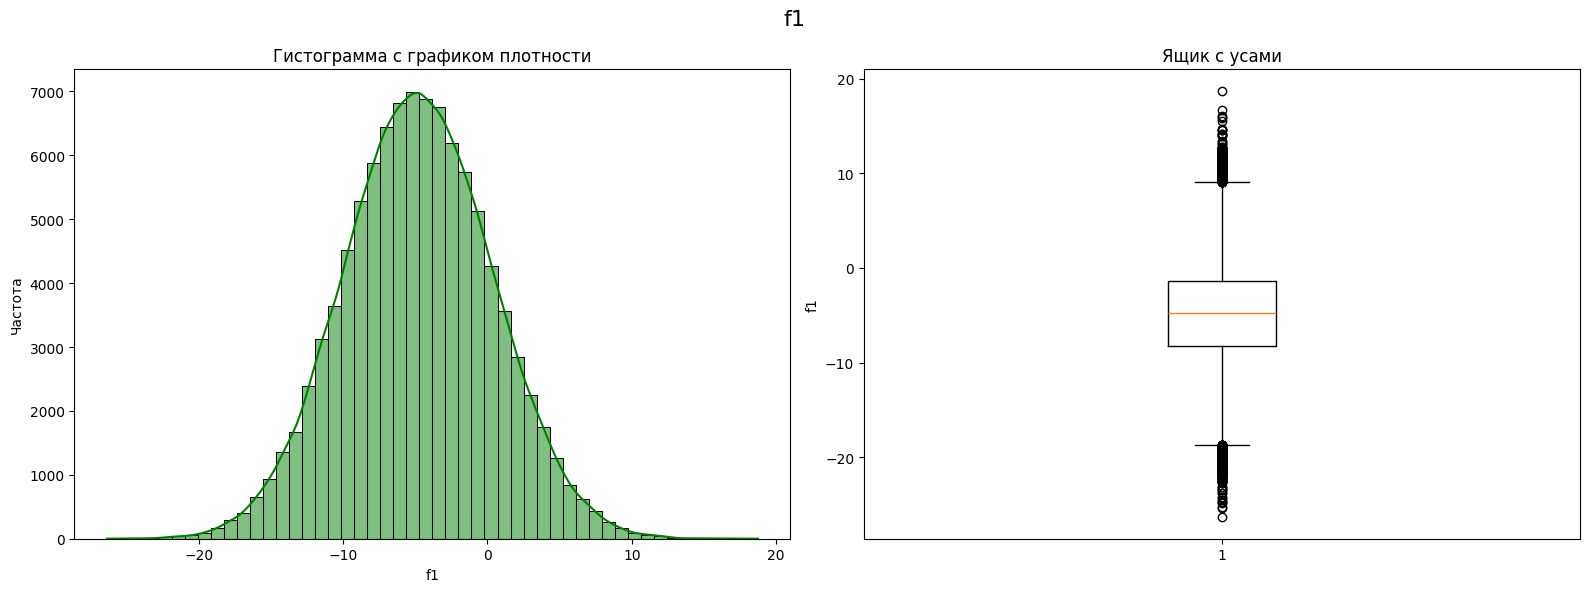

In [13]:
hist_box_df(geo2, 'f1', 'f1')

- Распределение очень близко к нормальному, но скорее всего, это также распеределение Стьюдента из-за относительно небольшой ширины колокола.
- Выбросы присутсвуют и расположены в данных симметрично, примерно на одних значениях. На графике колебаний не вызывают.

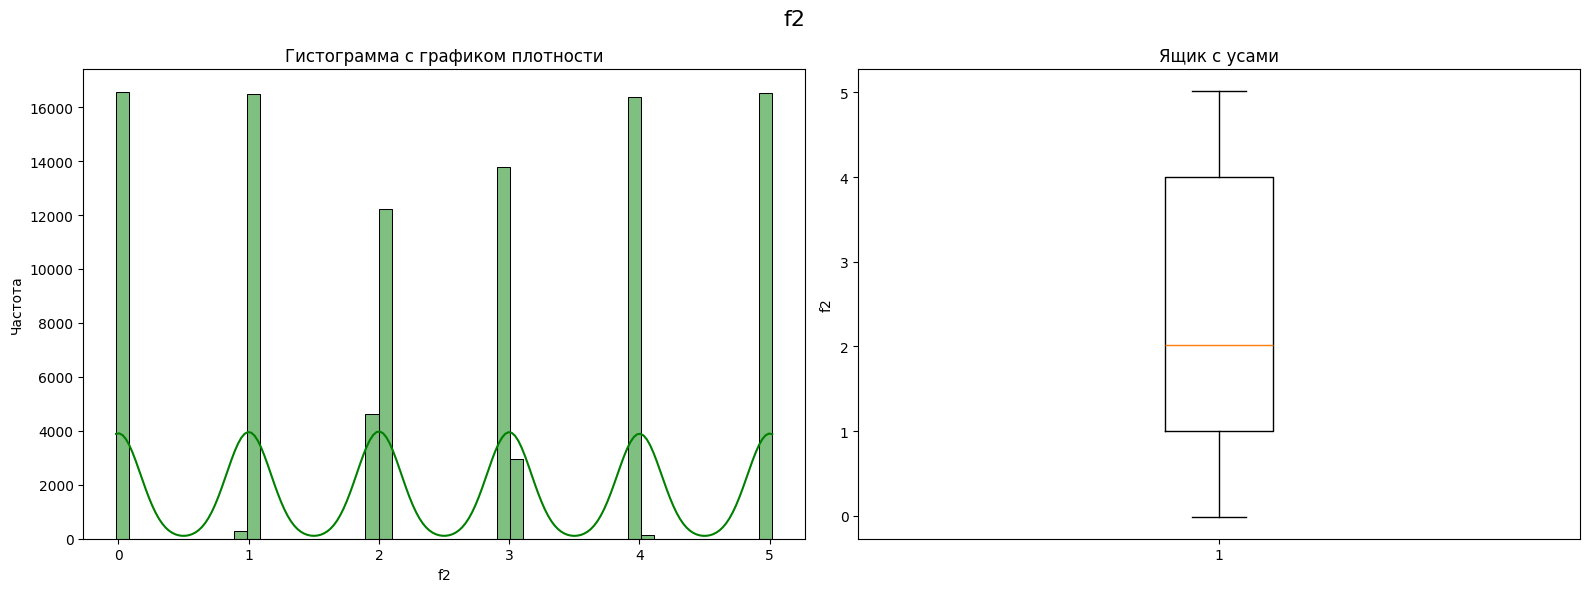

In [14]:
hist_box_df(geo2, 'f2', 'f2')

- Распределение отсутсвует, гистограмма напоминает визуализацию категориальных признаков. В данном случае, почти фиксированные значения от 0 до 5.
- Выбросов нет.

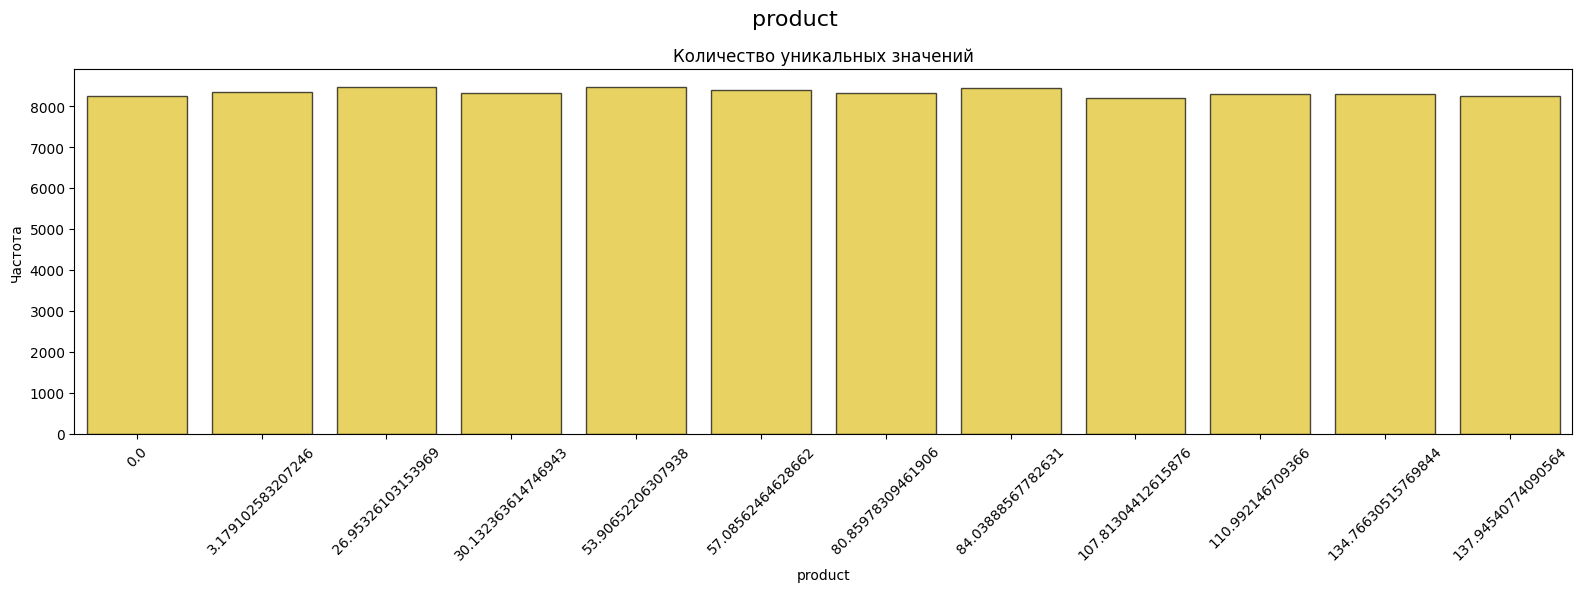

In [15]:
hist_box_df(geo2, 'product', 'product')

- Распределения нет, признак непрерывный. Количество каждого уникального значения примерно на одном уровне с остальными.

#### Третий регион

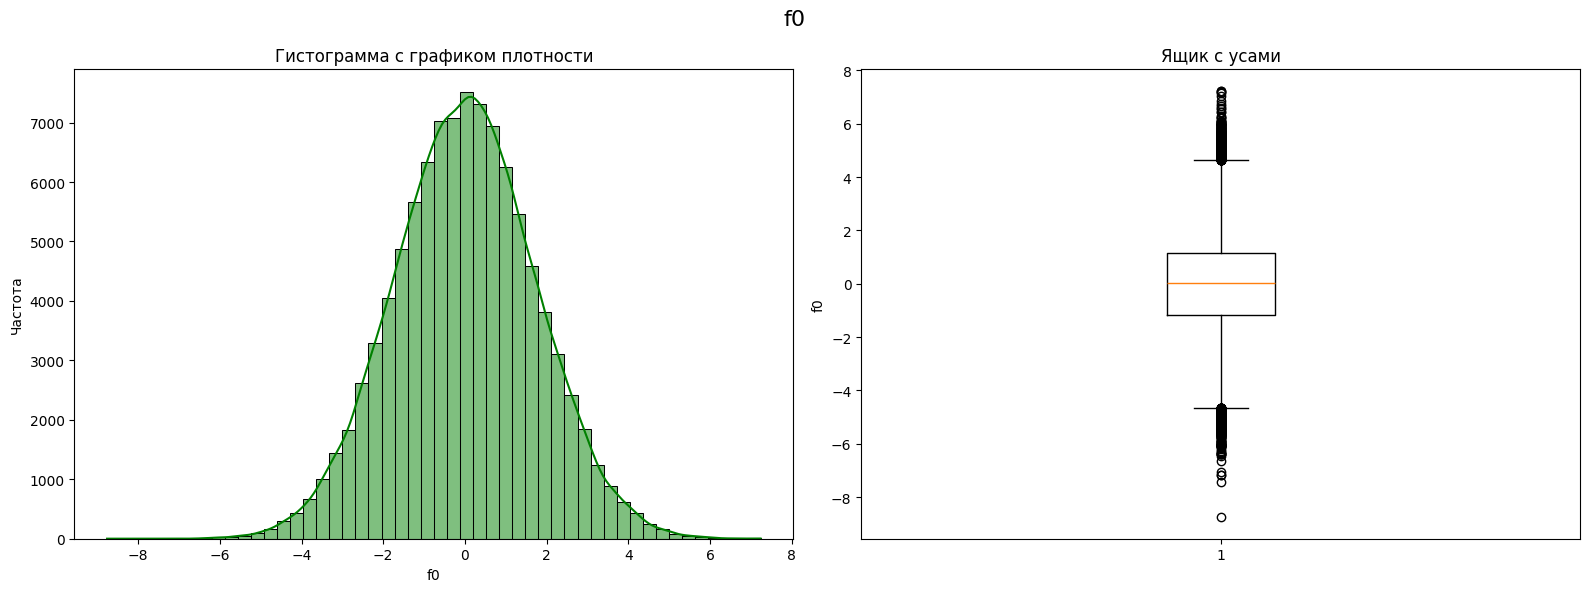

In [16]:
hist_box_df(geo3, 'f0', 'f0')

- Распределение Стьюдента.
- Выбросы есть.

- Распределения нет - явный убывающий тренд.

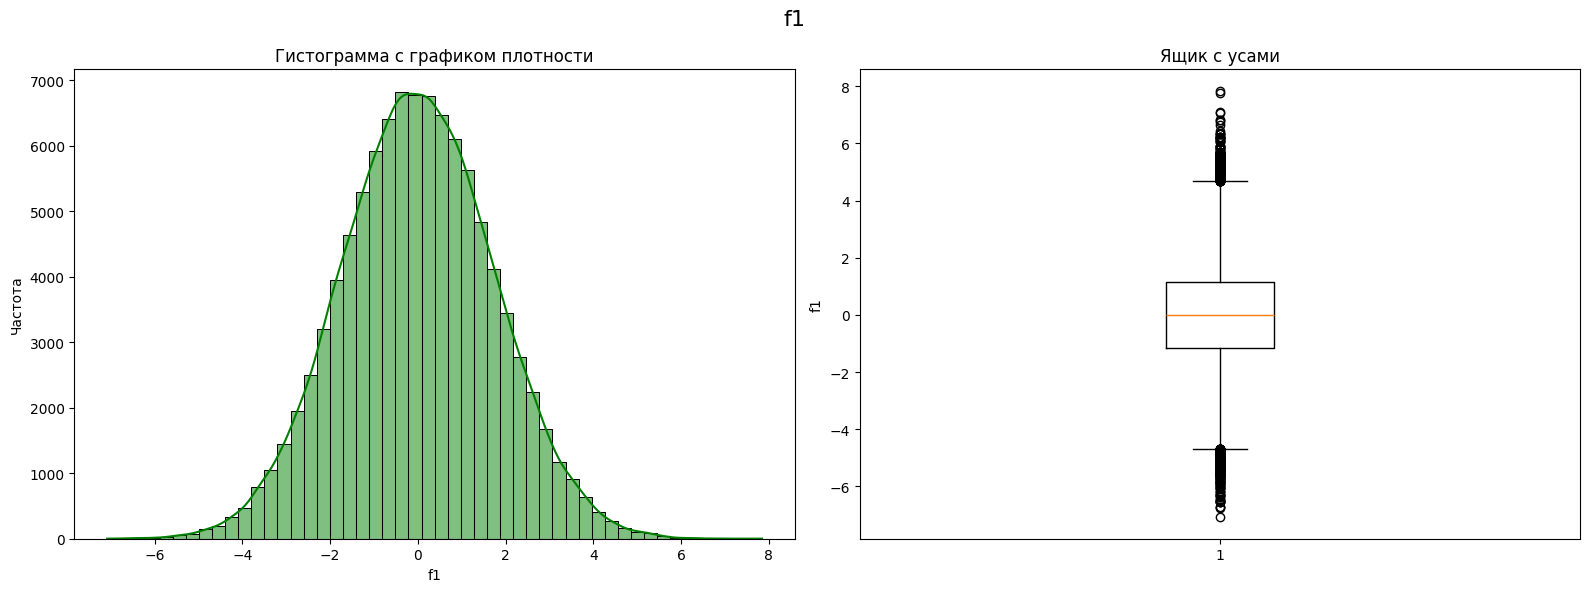

In [17]:
hist_box_df(geo3, 'f1', 'f1')

- Распределение Стьюдернта.
- Выбросы есть.

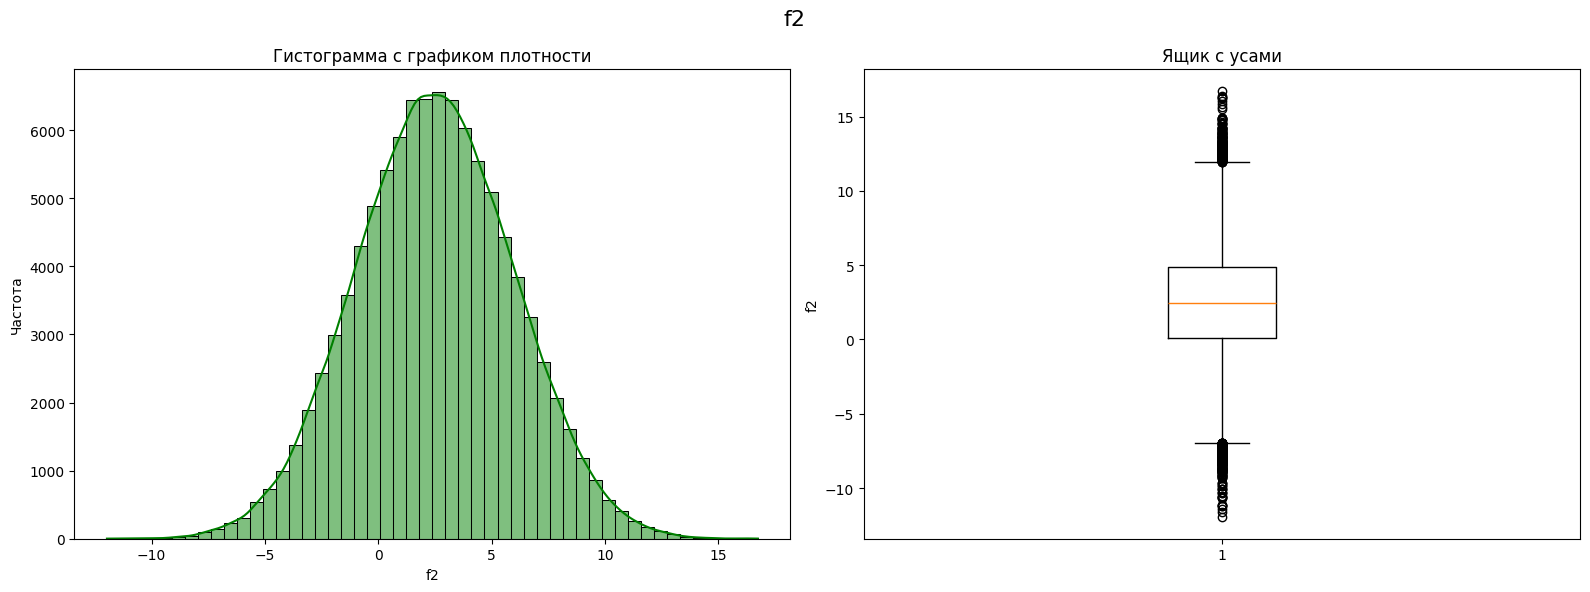

In [18]:
hist_box_df(geo3, 'f2', 'f2')

- Распределение Стьюдента.
- Выбросы есть.

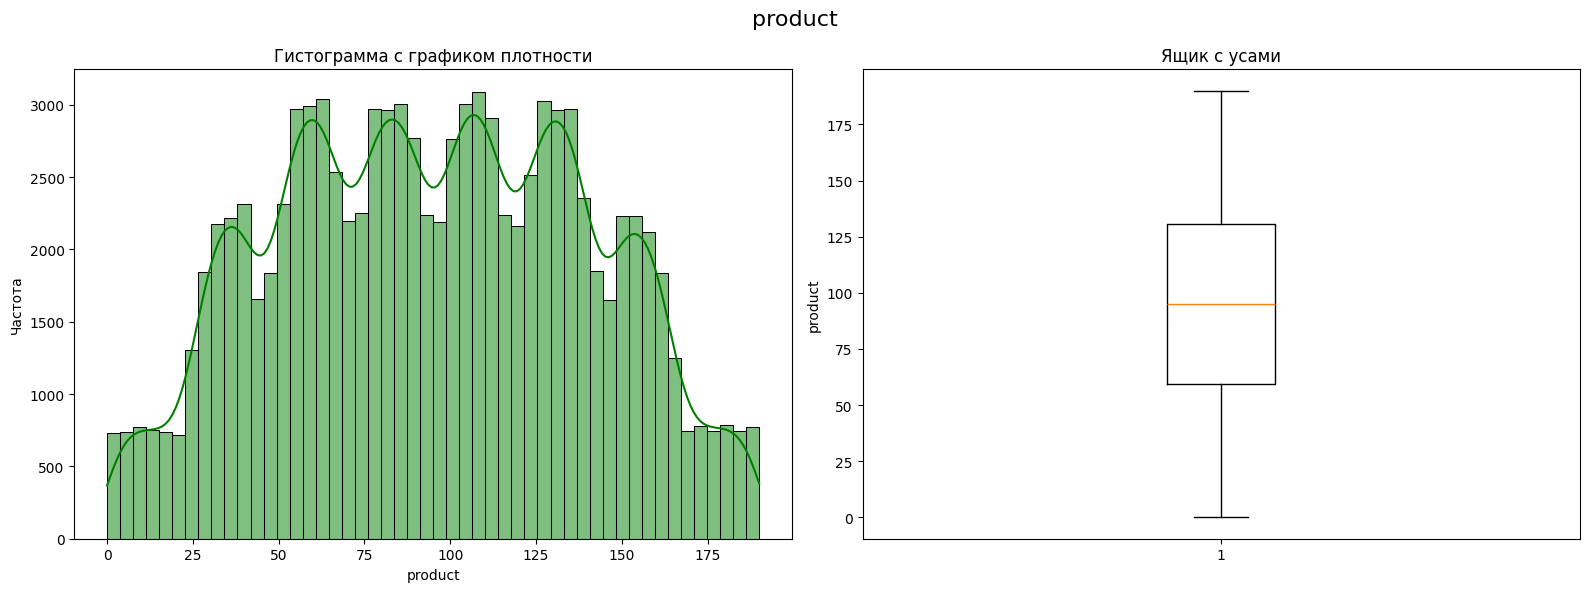

In [19]:
hist_box_df(geo3, 'product', 'product')

- Распределения нет. Гистограмма очень похожа на целевой признак первого региона.
- Выбросов нет.

### Вывод по исследовательскому анализу данных

В ходе исследовательского анализа данных для трех регионов были проанализированы количественные признаки: `f0`, `f1`, `f2` и `product`. На основе визуализаций гистограмм и диаграмм размаха можно сделать следующие выводы:

1. **Распределения признаков:**
   - В **первом регионе** для признаков `f0` и `f1 наблюдаются мультимодальные распределения (с несколькими пиками). Это свидетельствует о наличии нескольких групп данных, которые повторяются чаще всего. Признак `f2` имеет распределение, похожее на нормальное, но более узкое, что указывает на распределение Стьюдента. Признак `product` имеет очень специфическое распределение с несколькими пиками на одном уровне.
   - В **втором регионе** распределение для признаков `f0` и `f1 отличается от нормального и имеет бимодальную форму (два ярко выраженных пика), что также свидетельствует о наличии двух групп данных. Признак `f2` имеет распределение, схожее с категориальными признаками, с почти фиксированными значениями от 0 до 5. Признак `product` не имеет выраженного распределения, скорее всего, это непрерывный признак с равномерным распределением значений.
   - В **третьем регионе** все признаки (`f0`, `f1`, `f2`) имеют распределение, близкое к распределению Стьюдента, с выбросами в данных. Признак `product` также не имеет четко выраженного распределения, его гистограмма напоминает распределение в первом регионе.

2. **Выбросы:**
   - В данных **первого региона** выбросы не проявляются на графиках, несмотря на наличие некоторых особенностей в распределении.
   - Во **втором регионе** выбросы заметны для признаков `f1` и `product`, но они симметрично расположены и не вызывают значительных колебаний на графиках.
   - В **третьем регионе** выбросы присутствуют для всех признаков, что может потребовать дополнительного внимания при дальнейшем анализе и построении модели.

3. **Типы распределений:**
   - Для всех регионов характерно наличие распределений, которые могут быть близки к распределению Стьюдента, что указывает на особенности данных, такие как наличие экстремальных значений (выбросов) и большое количество наблюдений в некоторых областях.
   - Важно отметить, что многие признаки не имеют стандартных распределений (например, нормальных) и, вероятно, требуют более тщательной обработки.

## Корреляционный анализ данных

### Корреляционная матрица

In [20]:
def corr_matrix(df, interval_cols):
    matrix = df.phik_matrix(interval_cols=interval_cols)
    plt.figure(figsize=(5, 5))
    sns.heatmap(matrix, annot=True, square=True, cmap='coolwarm',
                cbar_kws={"shrink": .8}, annot_kws={"size": 12}, fmt=".2f", linewidths=.5)
    plt.title('Матрица корреляции', fontsize=20, fontweight='bold', pad=20)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()
    return matrix

def corr_strength(corr_value):
    if corr_value >= 0.7:
        return 'Сильная положительная корреляция'
    elif 0.3 <= corr_value < 0.7:
        return 'Умеренная положительная корреляция'
    elif -0.3 < corr_value < 0.3:
        return 'Отсутствие корреляции'
    elif -0.7 <= corr_value < -0.3:
        return 'Умеренная отрицательная корреляция'
    else:
        return 'Сильная отрицательная корреляция'

def corr_matrix_labels(df, interval_cols):
    matrix = corr_matrix(df, interval_cols)
    corr_labels = matrix.stack().apply(corr_strength).unstack()
    return corr_labels

#### Первый регион

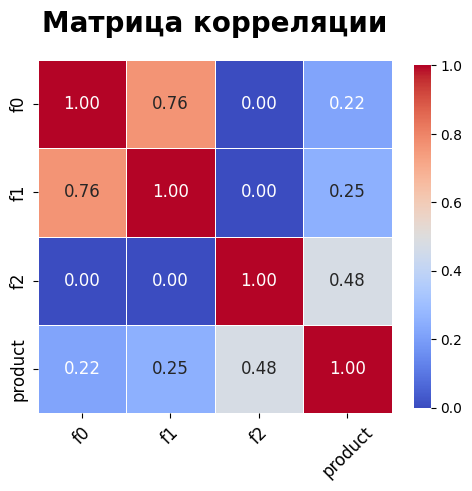

f0                                f1  \
f0       Сильная положительная корреляция  Сильная положительная корреляция   
f1       Сильная положительная корреляция  Сильная положительная корреляция   
f2                  Отсутствие корреляции             Отсутствие корреляции   
product             Отсутствие корреляции             Отсутствие корреляции   

                                         f2  \
f0                    Отсутствие корреляции   
f1                    Отсутствие корреляции   
f2         Сильная положительная корреляция   
product  Умеренная положительная корреляция   

                                    product  
f0                    Отсутствие корреляции  
f1                    Отсутствие корреляции  
f2       Умеренная положительная корреляция  
product    Сильная положительная корреляция

In [21]:
interval_cols = ['f0', 'f1', 'f2', 'product']

corr_labels = corr_matrix_labels(geo1, interval_cols)
corr_labels

На основе представленных данных о корреляциях между различными переменными можно сделать несколько ключевых выводов о взаимосвязях в наборе данных. Вот основные наблюдения:

**1. Сильная положительная корреляция**
- Переменные `f0` и `f1` имеют сильную положительную корреляцию, что указывает на то, что с увеличением одной переменной другая также, скорее всего, будет увеличиваться.
- Переменные `f0` и `f2` также имеют сильную положительную корреляцию.

**2. Умеренная положительная корреляция**
- Переменные `f2` и `product` имеют умеренную положительную корреляцию, что говорит о том, что существует некоторый уровень зависимости между ними, однако она не так сильна, как в предыдущих случаях.

**3. Отсутствие корреляции**
- Между переменными `f0`, `f1` и `product` не наблюдается корреляции, что говорит о том, что изменения в одной переменной не влияют на изменения в другой.

**4. Мультиколлинеарность**
- Мультиколлинеарность возникает, когда существует высокая корреляция между независимыми переменными, обычно при значении корреляции выше 0.95. В предоставленных данных явление мультиколлинеарности не наблюдается, так как ни один из коэффициентов корреляции не превышает этот порог.

#### Второй регион

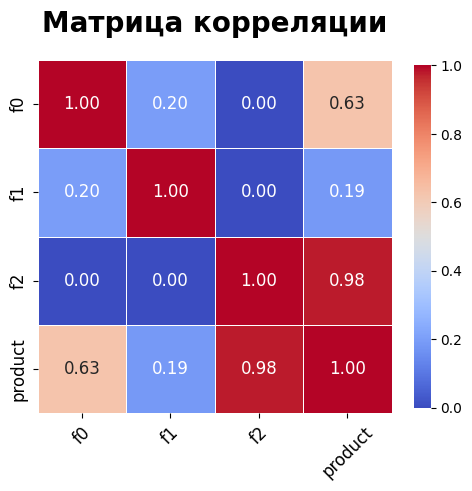

f0                                f1  \
f0         Сильная положительная корреляция             Отсутствие корреляции   
f1                    Отсутствие корреляции  Сильная положительная корреляция   
f2                    Отсутствие корреляции             Отсутствие корреляции   
product  Умеренная положительная корреляция             Отсутствие корреляции   

                                       f2                             product  
f0                  Отсутствие корреляции  Умеренная положительная корреляция  
f1                  Отсутствие корреляции               Отсутствие корреляции  
f2       Сильная положительная корреляция    Сильная положительная корреляция  
product  Сильная положительная корреляция    Сильная положительная корреляция

In [22]:
interval_cols = ['f0', 'f1', 'f2', 'product']

corr_labels = corr_matrix_labels(geo2, interval_cols)
corr_labels

На основе представленных данных о корреляциях между переменными можно сделать следующие ключевые выводы:

**1. Сильная положительная корреляция**
- Переменные `f2` и `product` имеют сильную положительную корреляцию, что указывает на значимую взаимосвязь между ними: увеличение одной переменной, вероятно, связано с увеличением другой.
- Переменные `f0` и `f1`, а также `f1` и `f2`, хотя и не имеют сильной корреляции, показывают, что в данных присутствует разнообразие в взаимосвязях.

**2. Умеренная положительная корреляция**
- Переменные `f0` и `product` имеют умеренную положительную корреляцию, что также говорит о наличии зависимости, но она менее выражена по сравнению с сильной корреляцией.

**3. Отсутствие корреляции**
- Между переменными `f0`, `f1`, и `f2` наблюдается отсутствие корреляции, что указывает на то, что изменения в одной из этих переменных не влияют на изменения в других. Это может свидетельствовать о независимости этих факторов в рассматриваемом наборе данных.

**4. Взаимосвязи между переменными**
- Корреляционные зависимости показывают, что, несмотря на наличие сильной корреляции между `f2` и `product`, другие переменные (такие как `f0` и `f1`) не влияют на них, что может быть важно при анализе и интерпретации данных.

**5. Мультиколлинеарность**
- Мультиколлинеарности нет.

#### Третий регион

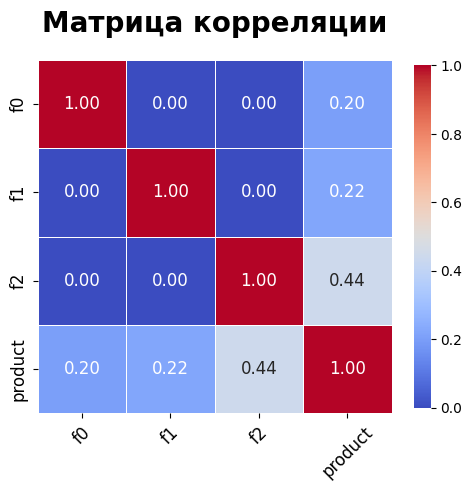

f0                                f1  \
f0       Сильная положительная корреляция             Отсутствие корреляции   
f1                  Отсутствие корреляции  Сильная положительная корреляция   
f2                  Отсутствие корреляции             Отсутствие корреляции   
product             Отсутствие корреляции             Отсутствие корреляции   

                                         f2  \
f0                    Отсутствие корреляции   
f1                    Отсутствие корреляции   
f2         Сильная положительная корреляция   
product  Умеренная положительная корреляция   

                                    product  
f0                    Отсутствие корреляции  
f1                    Отсутствие корреляции  
f2       Умеренная положительная корреляция  
product    Сильная положительная корреляция

In [23]:
interval_cols = ['f0', 'f1', 'f2', 'product']

corr_labels = corr_matrix_labels(geo3, interval_cols)
corr_labels

На основе представленных данных о корреляциях между переменными можно сделать следующие ключевые выводы:

**1. Сильная положительная корреляция**
- Переменные `f0` и `f1` имеют сильную положительную корреляцию, что указывает на значимую взаимосвязь между ними: увеличение одной переменной, вероятно, связано с увеличением другой.
- Переменные `f2` и `product` также имеют сильную положительную корреляцию, что говорит о том, что увеличение `f2` связано с увеличением `product`.

**2. Умеренная положительная корреляция**
- Переменные `f2` и `product` имеют умеренную положительную корреляцию. Это указывает на наличие зависимости между ними, но она менее выражена по сравнению с сильной корреляцией.

**3. Отсутствие корреляции**
- Между переменными `f0`, `f1`, и `f2` наблюдается отсутствие корреляции, что указывает на то, что изменения в одной из этих переменных не влияют на изменения в других. Это может свидетельствовать о независимости этих факторов в рассматриваемом наборе данных.

**4. Взаимосвязи между переменными**
- Корреляционные зависимости показывают, что, несмотря на наличие сильной корреляции между `f0` и `f1`, а также `f2` и `product`, другие переменные не влияют на них.

**5. Мультиколлинеарность**
- Мультиколлинеарности нет.

### График зависимости признаков

In [24]:
def plot_scatter_matrix(df):
    numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
    
    relation_corr = sns.PairGrid(df[numeric_cols], diag_sharey=False, corner=True, height=4)
    
    relation_corr.map(sns.scatterplot, color='gold', edgecolor='black', alpha=0.5)
    relation_corr.add_legend()
    plt.suptitle('Матрица рассеяния', fontsize=20, fontweight='bold', y=1.02)
    plt.subplots_adjust(top=0.95)
    
    plt.show()

#### Первый регион

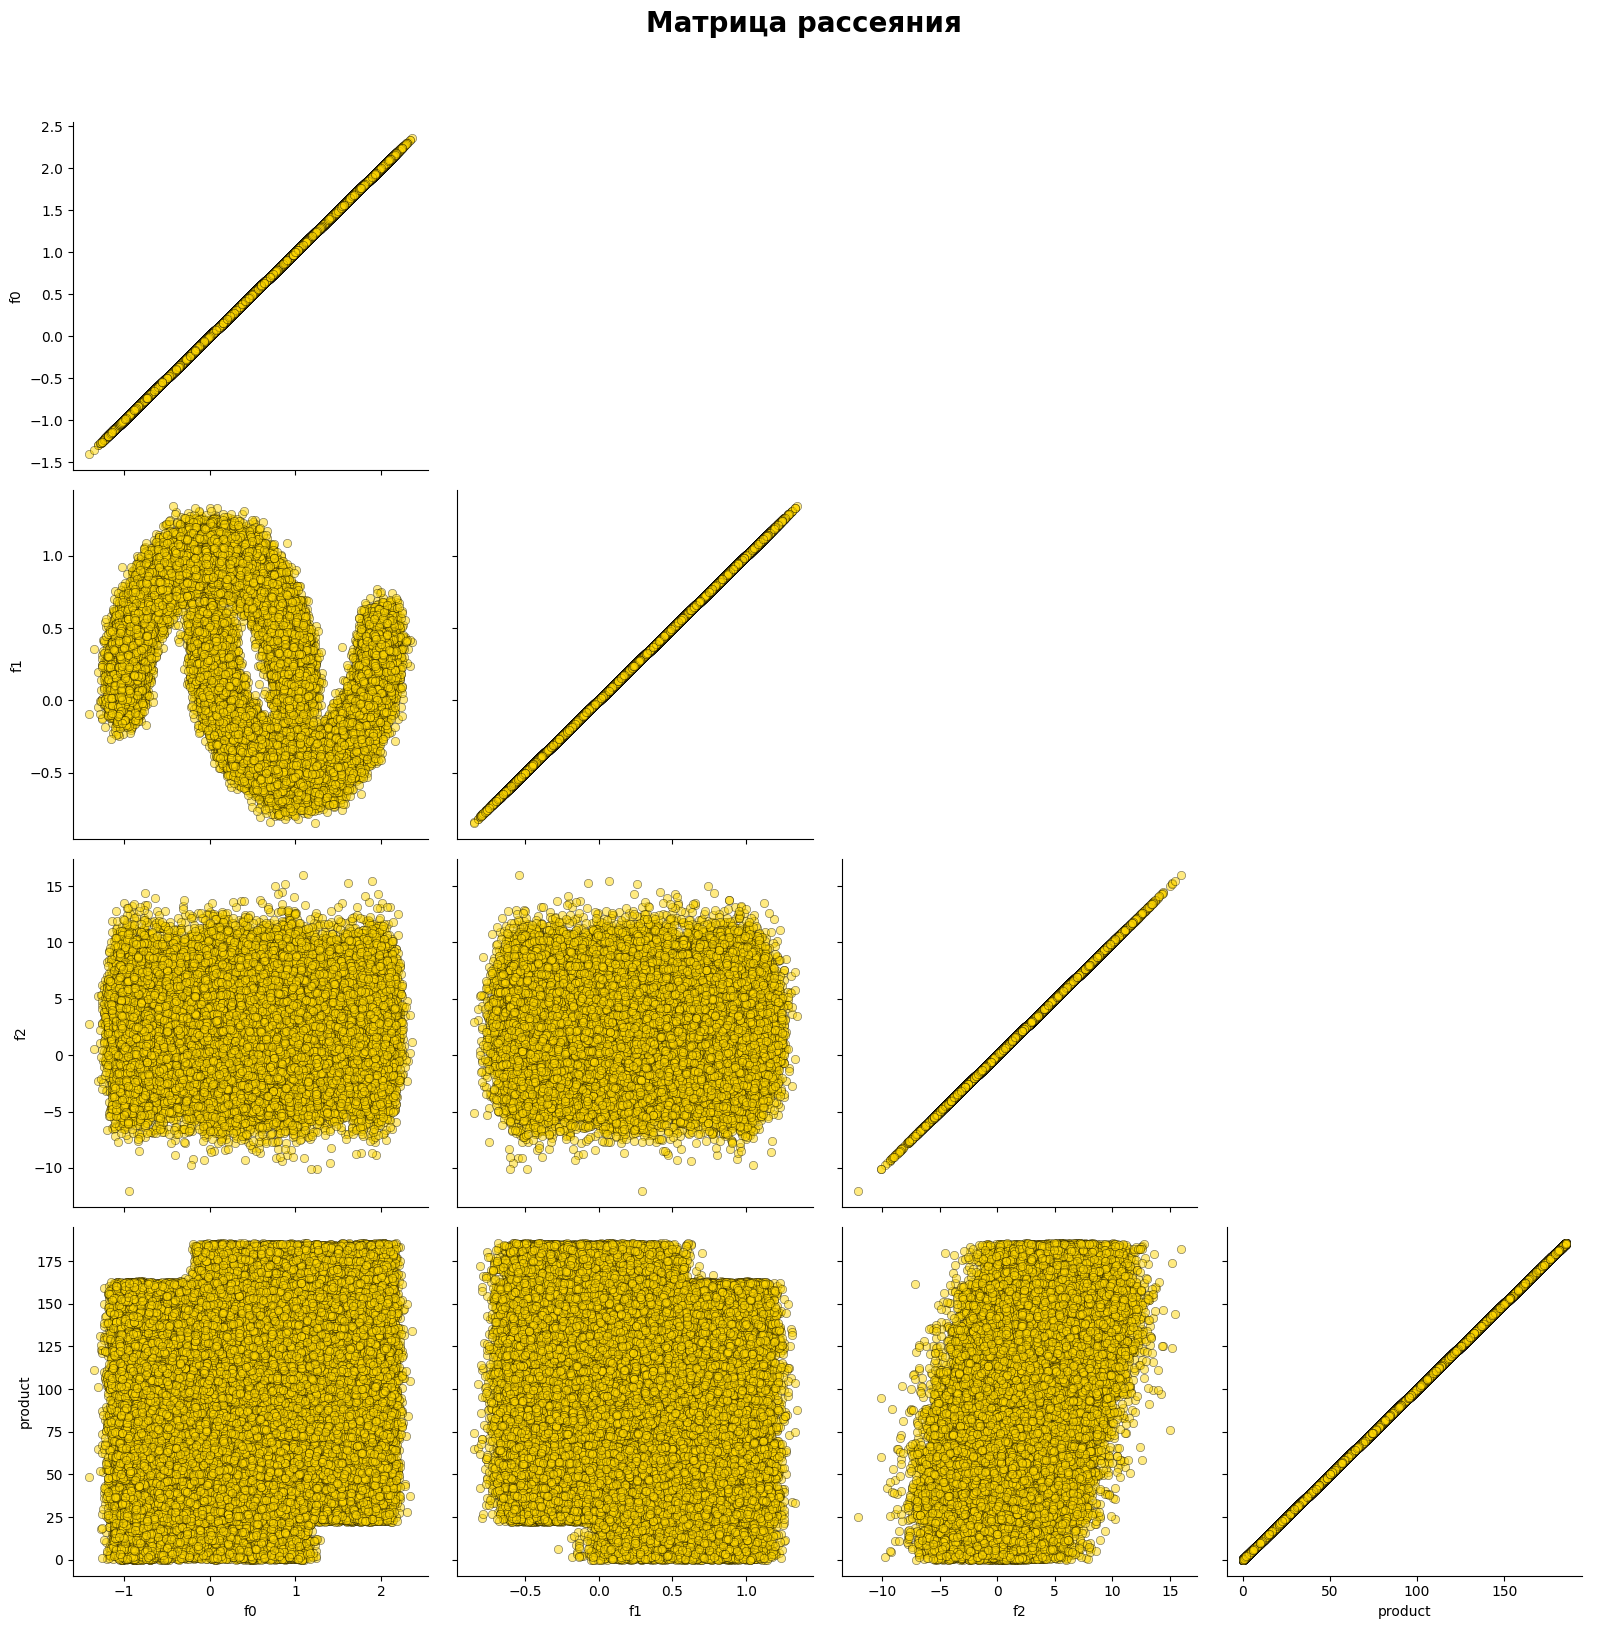

In [25]:
plot_scatter_matrix(geo1)

- Зависимости между значениями столбца product и f0, f1 нелинейные, хоть это и слабо выражено.
- Крайне интересную зависимость можно заметить между f1 и f0. Линейности явно нет, напоминает зависимость в многомерном пространстве, перенесенную на плоскость, так как данные явно разделены и симметричны друг другу, пусть и с небольшим смещением.

#### Второй регион

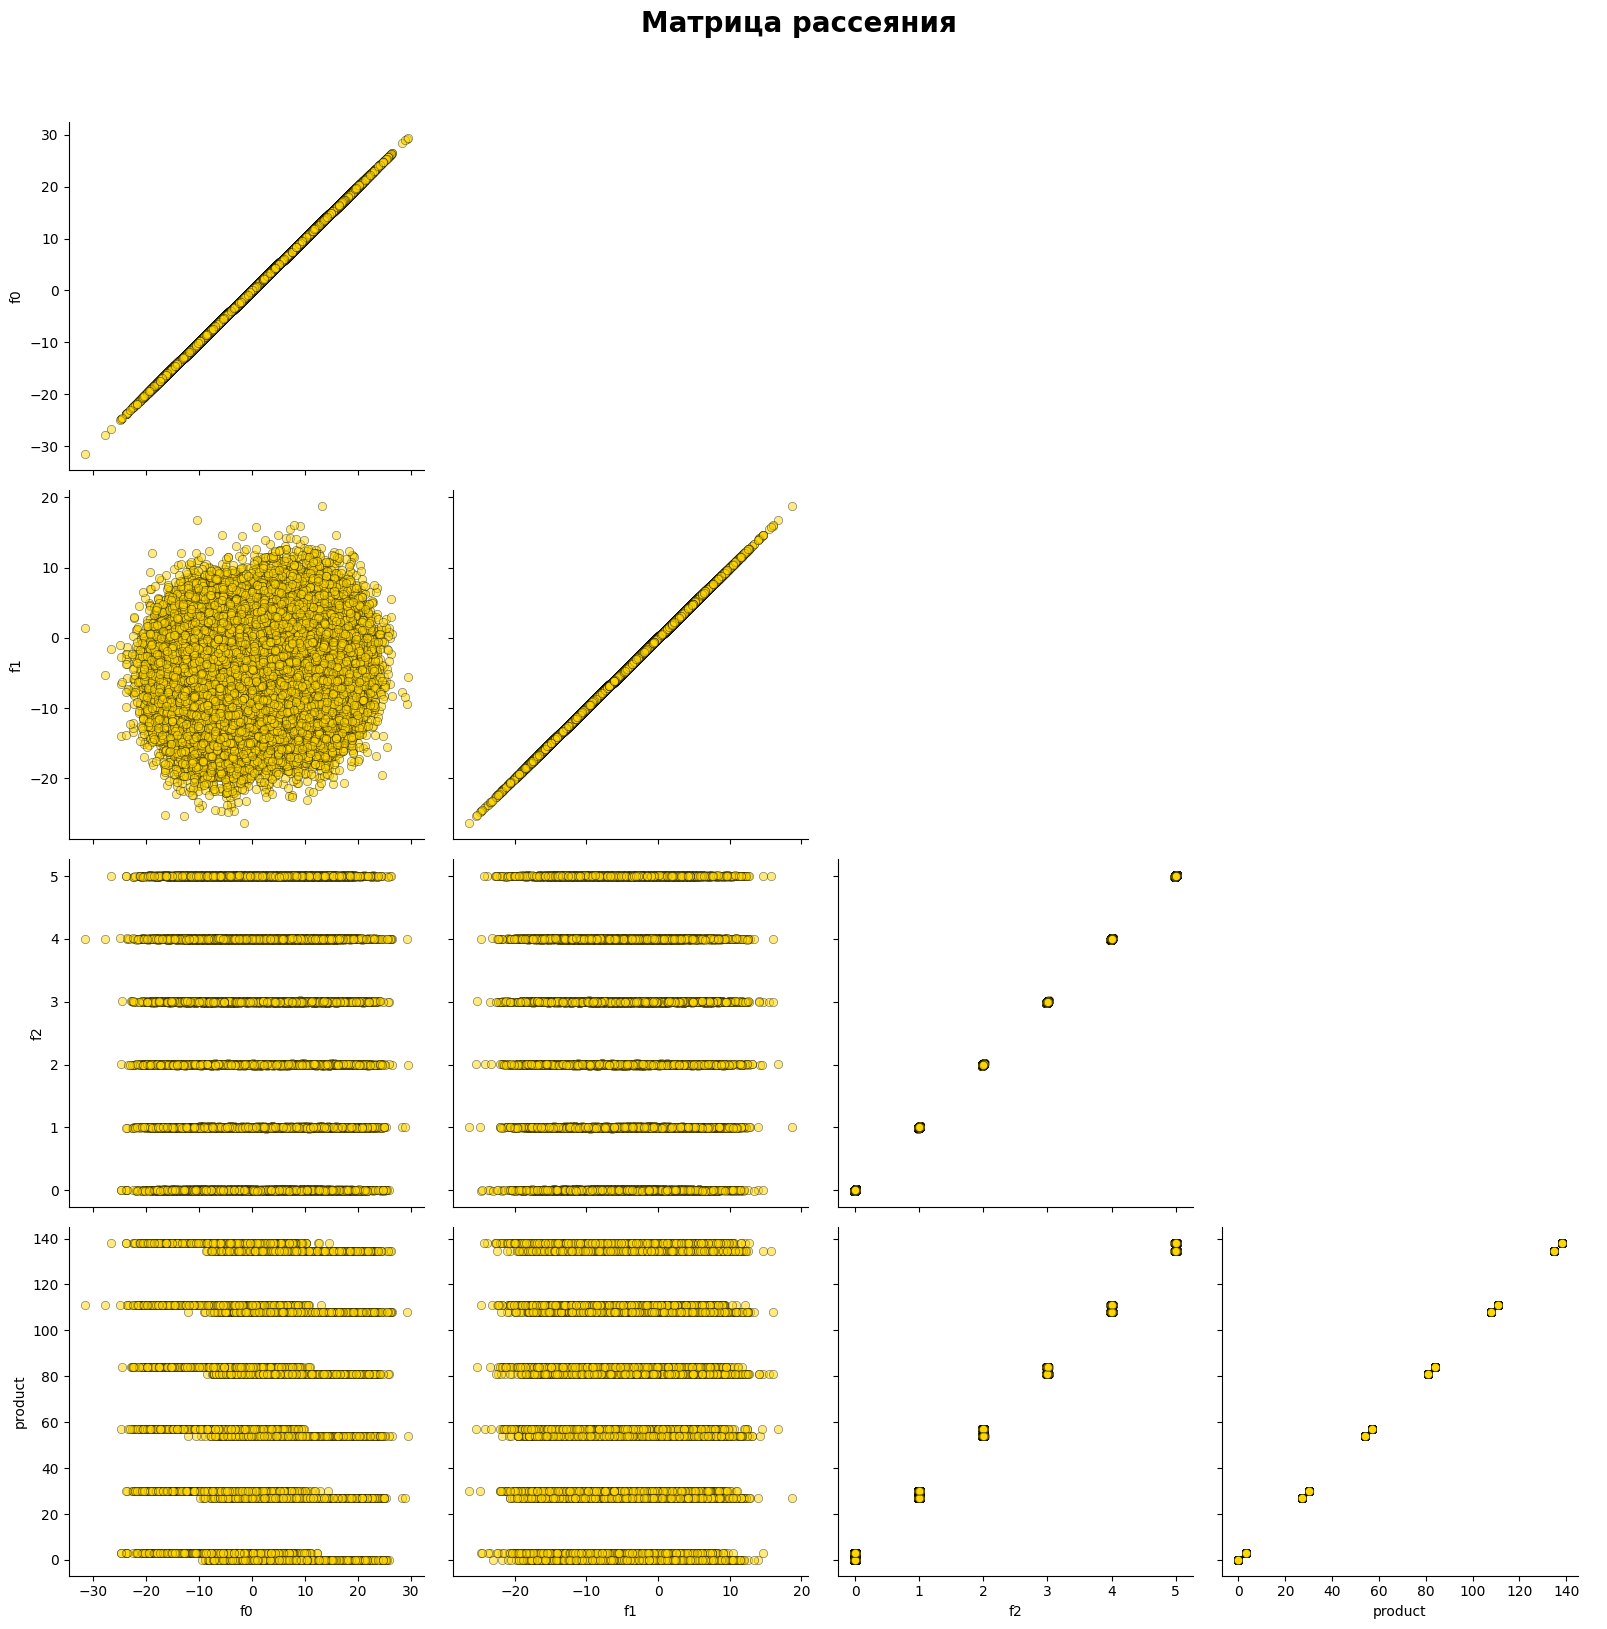

In [26]:
plot_scatter_matrix(geo2)

- Зависимости между большинством пар признаков - нелинейные.
- Между product и f2 связь линейная, но график похож на график категориальных данных, слишком четкое разделение.

#### Третий регион

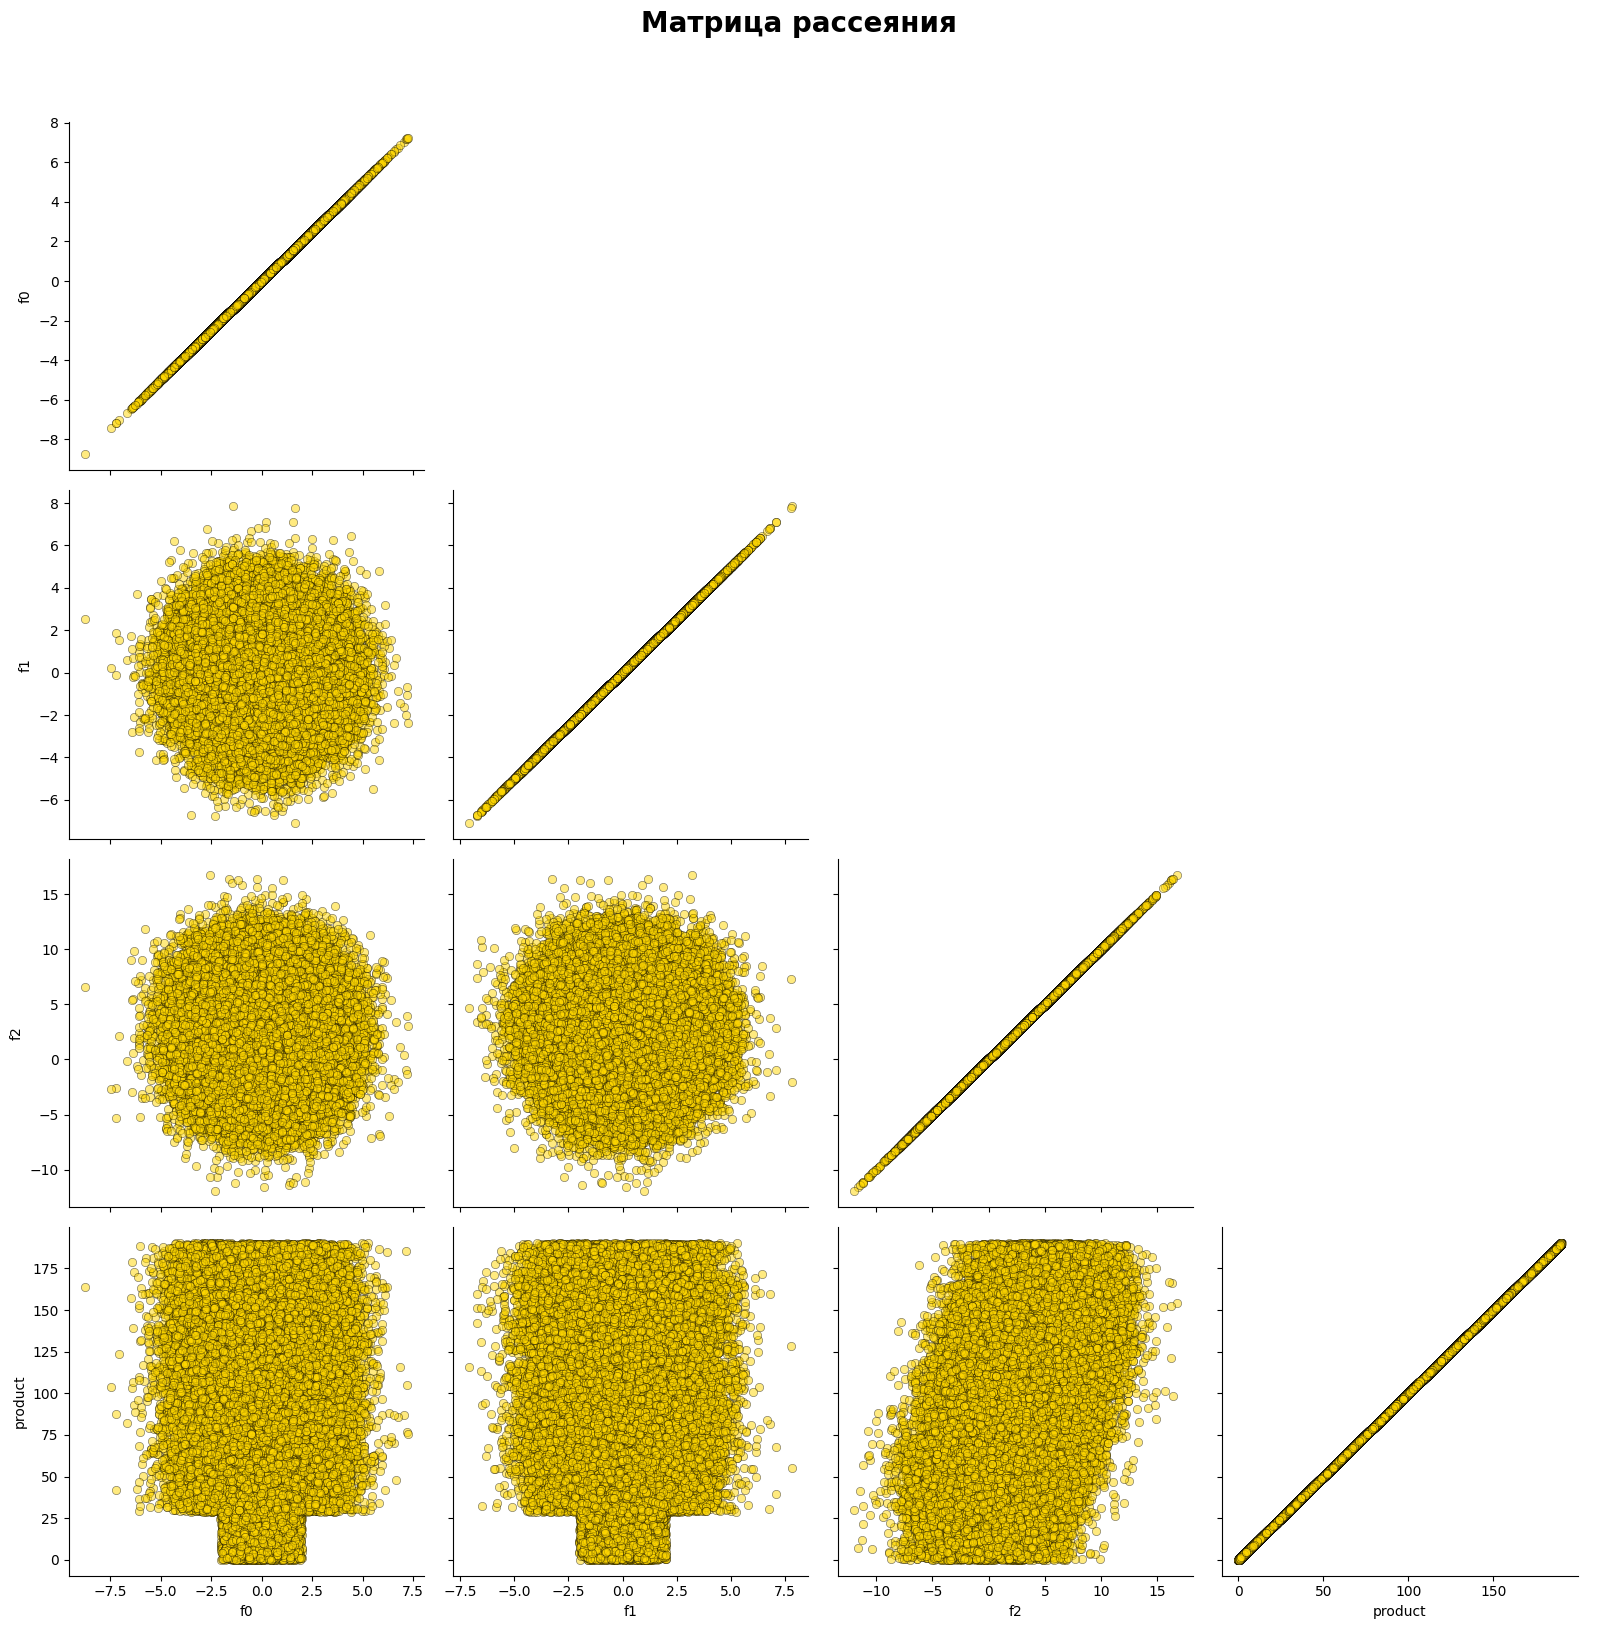

In [27]:
plot_scatter_matrix(geo3)

- Между техническими характеристиками связи нет.
- Между product и остальными признаками какие-то нелинейные облака в форме перевернутой бутылки. А с признаком f2 связь линейная, но очень-очень слабая - облако и его границы четко сформированы, наклон присутсвует, но облако слишком широкое и наклон слабый.

### Вывод по корреляционному анализу данных

На основе проведенного корреляционного анализа для всех трех регионов можно сделать несколько важных выводов:

1. **Сильная положительная корреляция:**
   - В данных наблюдается сильная положительная корреляция между переменными `f0` и `f1` в первом регионе, а также между переменными `f2` и `product` в каждом из регионов. Это означает, что увеличение одного из этих признаков скорее всего приводит к увеличению другого. Однако, важно отметить, что корреляции между `f0`, `f1`, и `product` в первом регионе и между `f0` и `product` во втором и третьем регионах отсутствуют, что указывает на отсутствие прямой связи между этими признаками.

2. **Умеренная положительная корреляция:**
   - В некоторых случаях наблюдается умеренная положительная корреляция, например, между `f2` и `product` в первом и третьем регионах. Это означает, что существует зависимость между этими признаками, но она менее выражена, чем в случае сильной корреляции.

3. **Отсутствие корреляции:**
   - В некоторых случаях между переменными не наблюдается корреляции, что говорит о том, что изменения в одной переменной не связаны с изменениями в другой. Например, между `f0`, `f1`, и `product` в первом регионе.

4. **Мультиколлинеарность:**
   - Мультиколлинеарность, как явление, не наблюдается в данных, поскольку ни одна из корреляций не превышает пороговых значений (например, 0.95). Это важно, потому что мультиколлинеарность может затруднить интерпретацию модели и привести к ошибочным выводам.

5. **Графический анализ:**
   - Визуализация данных с помощью матрицы рассеяния (scatter plot matrix) показала, что в большинстве случаев зависимости между переменными являются нелинейными, что может свидетельствовать о сложности их взаимодействий. Например, в первом регионе видна интересная зависимость между `f0` и `f1`, которая имеет форму облака, напоминающую многомерную зависимость, перенесенную на плоскость. В то же время, зависимость между `f2` и `product` во втором и третьем регионах имеет более четкую линейную форму, но, в целом, эти зависимости остаются слабыми или ненавязчивыми.

## Обучение моделей

In [28]:
# функция для обучения модели и анализа
def analyze_region(data):
    # разделение данных на признаки и целевую переменную
    X = data[['f0', 'f1', 'f2']]
    y = data['product']
    
    # разделение на обучающую и валидационную выборки (75:25)
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)
    
    # обучение модели
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # предсказания на валидационной выборке
    predictions = model.predict(X_valid)
    
    # сохранение предсказаний
    results = y_valid.reset_index(drop=True)
    
    # средний запас сырья и RMSE
    rmse = np.sqrt(mean_squared_error(y_valid, predictions))
    avg_predicted = predictions.mean()
    
    # результаты
    print("Средний запас сырья в регионе:", avg_predicted)
    print("RMSE:", rmse)
    
    return results, predictions, avg_predicted, rmse

# анализ и предсказания для каждого региона
results_1, predictions_1, avg_pred_1, rmse_1 = analyze_region(geo1)
results_2, predictions_2, avg_pred_2, rmse_2 = analyze_region(geo2)
results_3, predictions_3, avg_pred_3, rmse_3 = analyze_region(geo3)

Средний запас сырья в регионе: 92.39879990657768
RMSE: 37.75660035026169
Средний запас сырья в регионе: 68.71287803913762
RMSE: 0.8902801001028854
Средний запас сырья в регионе: 94.77102387765939
RMSE: 40.14587231134218


### Вывод по обучению и предсказаниям моделей

**Средний запас сырья и RMSE для каждого региона:**

- **Регион 1:**
  - Средний запас сырья: 92.40 тыс. баррелей.
  - RMSE: 37.76 — это довольно высокое значение ошибки, что может свидетельствовать о значительном разбросе в предсказаниях модели.
  
- **Регион 2:**
  - Средний запас сырья: 68.71 тыс. баррелей.
  - RMSE: 0.89 — это гораздо меньшая ошибка, что указывает на более стабильные и точные предсказания модели.
  
- **Регион 3:**
  - Средний запас сырья: 94.77 тыс. баррелей.
  - RMSE: 40.15 — это тоже довольно высокая ошибка, что может говорить о недостаточной точности модели в данном регионе.

**Итог:**
- Регион 2 имеет наименьшую ошибку (RMSE = 0.89), что говорит о высокой точности модели для этого региона. Однако его средний запас сырья (68.71 тыс. баррелей) также меньше, чем у других регионов.
- Регион 1 и регион 3 имеют более высокие значения RMSE, что может указывать на большую неопределенность в их оценках, несмотря на более высокие средние запасы сырья.

## Подготовка к расчету прибыли

In [29]:
# ключевые значения для расчётов
budget = 10_000_000_000  # бюджет на разработку скважин в регионе — 10 миллиардов рублей
price_per_point = 450  # доход с с единицы
num_wells = 200  # Количество скважин для разработки
total_points = 500

profit_per_well = budget / (num_wells * price_per_point * 1000)

print(f"Минимальный объём сырья на одной скважине для безубыточной разработки: {profit_per_well:.2f} тыс. баррелей")

Минимальный объём сырья на одной скважине для безубыточной разработки: 111.11 тыс. баррелей


In [30]:
regions = {
    "Регион 1": avg_pred_1,
    "Регион 2": avg_pred_2,
    "Регион 3": avg_pred_3,
}

for region, avg_stock in regions.items():
    if avg_stock >= profit_per_well:
        print(f"{region}: Средний запас сырья ({avg_stock:.2f} тыс. баррелей) больше или равен минимально необходимому({profit_per_well:.2f} тыс. баррелей).")
    else:
        print(f"{region}: Средний запас сырья ({avg_stock:.2f} тыс. баррелей) меньше минимально необходимого ({profit_per_well:.2f} тыс. баррелей).")

Регион 1: Средний запас сырья (92.40 тыс. баррелей) меньше минимально необходимого (111.11 тыс. баррелей).
Регион 2: Средний запас сырья (68.71 тыс. баррелей) меньше минимально необходимого (111.11 тыс. баррелей).
Регион 3: Средний запас сырья (94.77 тыс. баррелей) меньше минимально необходимого (111.11 тыс. баррелей).


### Вывод по подготовке к расчету прибыли

- Минимальный объём сырья на одной скважине для безубыточной разработки составляет **111.11 тыс. баррелей**.

Затем, было произведено сравнение этого минимального объёма с средними запасами сырья в каждом регионе:

- **Регион 1**: Средний запас сырья — **92.40 тыс. баррелей**, что меньше минимально необходимого объёма (111.11 тыс. баррелей).
- **Регион 2**: Средний запас сырья — **68.71 тыс. баррелей**, что также меньше минимально необходимого объёма.
- **Регион 3**: Средний запас сырья — **94.77 тыс. баррелей**, что тоже меньше минимально необходимого объёма.

В каждом из трёх регионов средний запас сырья оказался ниже минимально необходимого для безубыточной разработки (111.11 тыс. баррелей).

## Расчет прибыли

In [31]:
def calculate_profit(target, predictions, num_wells=200):
    pred_sort = pd.Series(predictions).sort_values(ascending=False)
    best_points = target[pred_sort.index][:num_wells]
    
    # Выводим отладочную информацию
    # print(f'Predictions (sorted): {pred_sort.values}')
    # print(f'Best points: {best_points.values}')
    
    # рассчитываем прибыль
    profit = best_points.sum() * (price_per_point * 1000) - budget
    return profit

In [32]:
print(f'Прибыль от разработки в Регионе 1: {calculate_profit(results_1, predictions_1):.2f} рублей')
print(f'Прибыль от разработки в Регионе 2: {calculate_profit(results_2, predictions_2):.2f} рублей')
print(f'Прибыль от разработки в Регионе 3: {calculate_profit(results_3, predictions_3):.2f} рублей')

Прибыль от разработки в Регионе 1: 3359141114.46 рублей
Прибыль от разработки в Регионе 2: 2415086696.68 рублей
Прибыль от разработки в Регионе 3: 2598571759.37 рублей


#### важное замечание по данным

In [33]:
def calculate_profit_test(target, predictions, num_wells=200):
    pred_sort = pd.Series(predictions).sort_values(ascending=False)
    best_points = target[pred_sort.index][:num_wells]
    
    # Выводим отладочную информацию
    print(f'Predictions (sorted): {pred_sort.values}')
    print(f'Best points: {best_points.values}')
    
    # рассчитываем прибыль
    
    profit = best_points.sum() * (price_per_point * 1000) - budget
    return profit

print(f'Регион 2: {calculate_profit_test(results_2, predictions_2):.2f}')

Predictions (sorted): [139.98327694 139.70080344 139.6165444  ...  -1.92081761  -1.92742085
  -2.07062053]
Best points: [137.94540774 137.94540774 137.94540774 137.94540774 137.94540774
 137.94540774 137.94540774 137.94540774 137.94540774 137.94540774
 137.94540774 137.94540774 137.94540774 137.94540774 137.94540774
 137.94540774 137.94540774 137.94540774 137.94540774 137.94540774
 137.94540774 137.94540774 137.94540774 137.94540774 137.94540774
 137.94540774 137.94540774 137.94540774 137.94540774 137.94540774
 137.94540774 137.94540774 137.94540774 137.94540774 137.94540774
 137.94540774 137.94540774 137.94540774 137.94540774 137.94540774
 137.94540774 137.94540774 137.94540774 137.94540774 137.94540774
 137.94540774 137.94540774 137.94540774 137.94540774 137.94540774
 137.94540774 137.94540774 137.94540774 137.94540774 137.94540774
 137.94540774 137.94540774 137.94540774 137.94540774 137.94540774
 137.94540774 137.94540774 137.94540774 137.94540774 137.94540774
 137.94540774 137.9454

В процессе отладки кода, я заметил, что предоставленные данные по второму региону содержат аномалию - в процессе предсказания, данные многократно дублируются, но при этом, как дубликаты не отображаются, значит проблема в исходных значениях. 

Таким данным доверять нельзя, поэтому далее при расчетах я не буду обращать внимание на результаты, получаемые по ВТОРОМУ региону.

### Вывод по расчету прибыли

- Прибыль от разработки 200 лучших скважин каждого региона, несмотря на низкие показатели среднего значения запаса по этому региону, достаочная и во много раз превышает бюджет, затраченный на разработку, однако нужно проверить, можно ли сделать такой вывод по большему количеству выборок лучших скважин.

## Расчет рисков и средней прибыли для каждого региона

In [34]:
state = np.random.RandomState(12345)

# bootstrap
def bootstrap_profit(target, predictions, region):
    profits = []
    for i in range(1000):
        # выборка в возвращением
        subsample_target = target.sample(500, replace=True, random_state=state)
        subsample_preds = predictions[subsample_target.index]

        subsample_target = subsample_target.reset_index(drop=True)
        subsample_preds = pd.Series(subsample_preds).reset_index(drop=True)

        # прибыль для текущей выборки и помещение ее в профитс
        profits.append(calculate_profit(subsample_target, subsample_preds, num_wells=200))

    profits = pd.Series(profits)
    lower_quant = profits.quantile(0.025)
    higher_quant = profits.quantile(0.975)
    profit_mean = profits.mean()
    risk = (profits < 0).mean()
    confidence_interval = f'(от: {lower_quant} до: {higher_quant})'

    print(f'Средняя прибыль для региона {region}: {profit_mean:.3f} руб.')
    print(f'Риск начала разработки региона {region}: {risk*100:.2f}%')
    print(f'Доверительный интервал для региона {region}: {confidence_interval}')
    # print(profits)

In [35]:
bootstrap_profit(results_1, predictions_1, 1)
bootstrap_profit(results_2, predictions_2, 2)
bootstrap_profit(results_3, predictions_3, 3)

Средняя прибыль для региона 1: 406278783.424 руб.
Риск начала разработки региона 1: 6.70%
Доверительный интервал для региона 1: (от: -117742136.49486831 до: 911737050.7514055)
Средняя прибыль для региона 2: 441504277.592 руб.
Риск начала разработки региона 2: 1.60%
Доверительный интервал для региона 2: (от: 35728489.280851334 до: 828006639.0043902)
Средняя прибыль для региона 3: 385213195.914 руб.
Риск начала разработки региона 3: 7.80%
Доверительный интервал для региона 3: (от: -164785166.1090443 до: 888206234.1976783)


### Вывод

- Средняя прибыль, риски и ддостаточно широкие доверительные интервалы позволяют твердро определить победителя на кастинге нефтяных скважин.
- По показателям риска, безусловно, побеждает только один кандидат - ВТОРОЙ регион.
- Однако, как было замечено выше, данным по этому региону доверять нельзя, такие результаты получились только из-за большого количества одинаковых данных с отличным показателем.
- Поэтому, исключая второй регион, побеждает на роль разработки ПЕРВЫЙ регион с сопоставимымой по объему прибыли со вторым регионом, но с риском немного выше.
- Беря в расчет разницу в рисках и разницу в сумме прибыли для этих двух регионов, можно произвести дополнительные расчеты:
- **441504277.592 руб (потенциальная прибыль со второго региона) - 6.7% (риски первого региона) = 411942150,99 руб (потенциальная прибыль со второго региона, если бы риск на нем был равен первому региону)**.

- Таким образом,
- **411942150,99 руб (потенциальная прибыль со второго региона, если бы риск на нем был равен первому региону) - 406278783.424 руб. (потенциальная прибыль с первого региона) = 5663367,57 руб (разница между прибылями первого и второго региона)**, разница получается не достаточно весомой, чтобы отказываться от разработки первого региона, несмотря на повышенный риск.

## Общий вывод

В данном проекте была проведена комплексная работа по выбору локации для бурения новой скважины для компании «ГлавРосГосНефть». Проект включал в себя анализ данных, построение модели для предсказания объема запасов нефти, а также оценку рисков и потенциальной прибыли.

**Ключевые моменты:**

1. **Общее количество записей**:
   - Каждый набор данных содержал 100,000 записей, что обеспечило надежную основу для анализа.

2. **Структура данных**:
   - Данные состояли из 5 колонок, включая уникальный идентификатор, 3 числовые признаки и целевую переменную.

3. **Статистические характеристики**:
   - Признаки f0, f1 и f2 имели различные диапазоны значений и распределения, что потребовало дополнительной обработки.
   - Целевая переменная `product` варьировалась от 0 до 190, что указывает на широкий диапазон результатов.

4. **Выявление выбросов и распределений**:
   - В каждом регионе были выявлены выбросы, которые могут повлиять на качество модели.
   - Распределения признаков показали наличие мультимодальных и бимодальных форм, что указывает на сложные связи между переменными.

5. **Корреляционный анализ**:
   - Наблюдались сильные и умеренные корреляции между переменными, однако мультиколлинеарность не была обнаружена.

6. **Средний запас сырья и RMSE**:
   - Регион 1: Средний запас — 92.40 тыс. баррелей, RMSE = 37.76.
   - Регион 2: Средний запас — 68.71 тыс. баррелей, RMSE = 0.89.
   - Регион 3: Средний запас — 94.77 тыс. баррелей, RMSE = 40.15.

**Итоги:**

1. **Прибыль от разработки**:
   - Несмотря на низкие запасы во втором регионе, прибыль от разработки превышает бюджет, однако данные этого региона оказались ненадежными.

2. **Риски**:
   - Регион 2 показывает низкий уровень риска, но данные содержат аномалии.
   - Регион 1, несмотря на более высокий риск, демонстрирует сопоставимую прибыль с Регионом 2.

3. **Рекомендации**:
   - Исключить Регион 2 из дальнейших расчетов.
   - Выбрать Регион 1 для разработки, так как он демонстрирует более высокую потенциальную прибыль.

**Заключение:**

Проект подтвердил, что Регион 1 является наиболее подходящим для бурения новой скважины, несмотря на повышенные риски. Данные по Региону 2 не могут быть приняты во внимание из-за их ненадежности, что поддерживает выбор первого региона как оптимального для разработки.